<p style="background-color:#FDFEFE; font-family:arial; color:#09042b; font-size:350%; text-align:center; border-radius:10px 10px;"></p>

<p style="background-color:#FDFEFE; font-family:arial; color:#09042b; font-size:400%; text-align:center; border-radius:10px 10px;"> Credit Score Classification</p>

<p style="background-color:#FDFEFE; font-family:arial; color:#09042b; font-size:350%; text-align:center; border-radius:10px 10px;"> EDA Project Part 2 </p>


<img src="https://t3.ftcdn.net/jpg/04/62/56/22/360_F_462562264_vzm8SoTxft5Ug3AEHjoPyHndtSGx6ymb.jpg" align="center"/>

<a id="toc"></a>

## <p style="background-color:#7da6ff; font-family:arial; color:#09042b; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>


* [Handling With Outliers](#6)
* [Final Evaluation of Data via Graphs After Handling With Outliers](#7)
* [Other Specific Analysis Questions](#8)
* [Final Step to make ready dataset for ML Models](#9)
* [The End of the Project](#10)

In [2]:
# import data analysis and visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# import warnings to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

**As we have compeleted exploring, cleaning the data, handling with missing values and handling with outliers for numerical features in the previous notebook (Credit Score Friendly Exploratory Data Analysis Part_1), we will work on handling with outliers for categorical features and perform final evaluation and some spesific analysis of the data in this notebook.**

In [3]:
df= pd.read_csv("df_cleaned.csv") # reading the df_cleaned.csv

In [4]:
# Creating a copy from df named df_copy

df_copy = df.copy()

## <p style="background-color:#7da6ff; font-family:arial; color:#09042b; font-size:175%; text-align:center; border-radius:10px 10px;">Handling With Outliers</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#09042b; background-color:#7da6ff" data-toggle="popover">Content</a>

## Handling with outliers for categorical features

In [5]:
df_categorical = df[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score']]

In [6]:
# checking the descriptive values of categorical features

df_categorical.describe()

Occupation Credit_Mix Payment_of_Min_Amount Credit_Score
count       98288      98288                 98288        98288
unique         15          3                     3            3
top        Lawyer   Standard                   Yes     Standard
freq         6984      45848                 52326        52509

### Countplot for categorical features

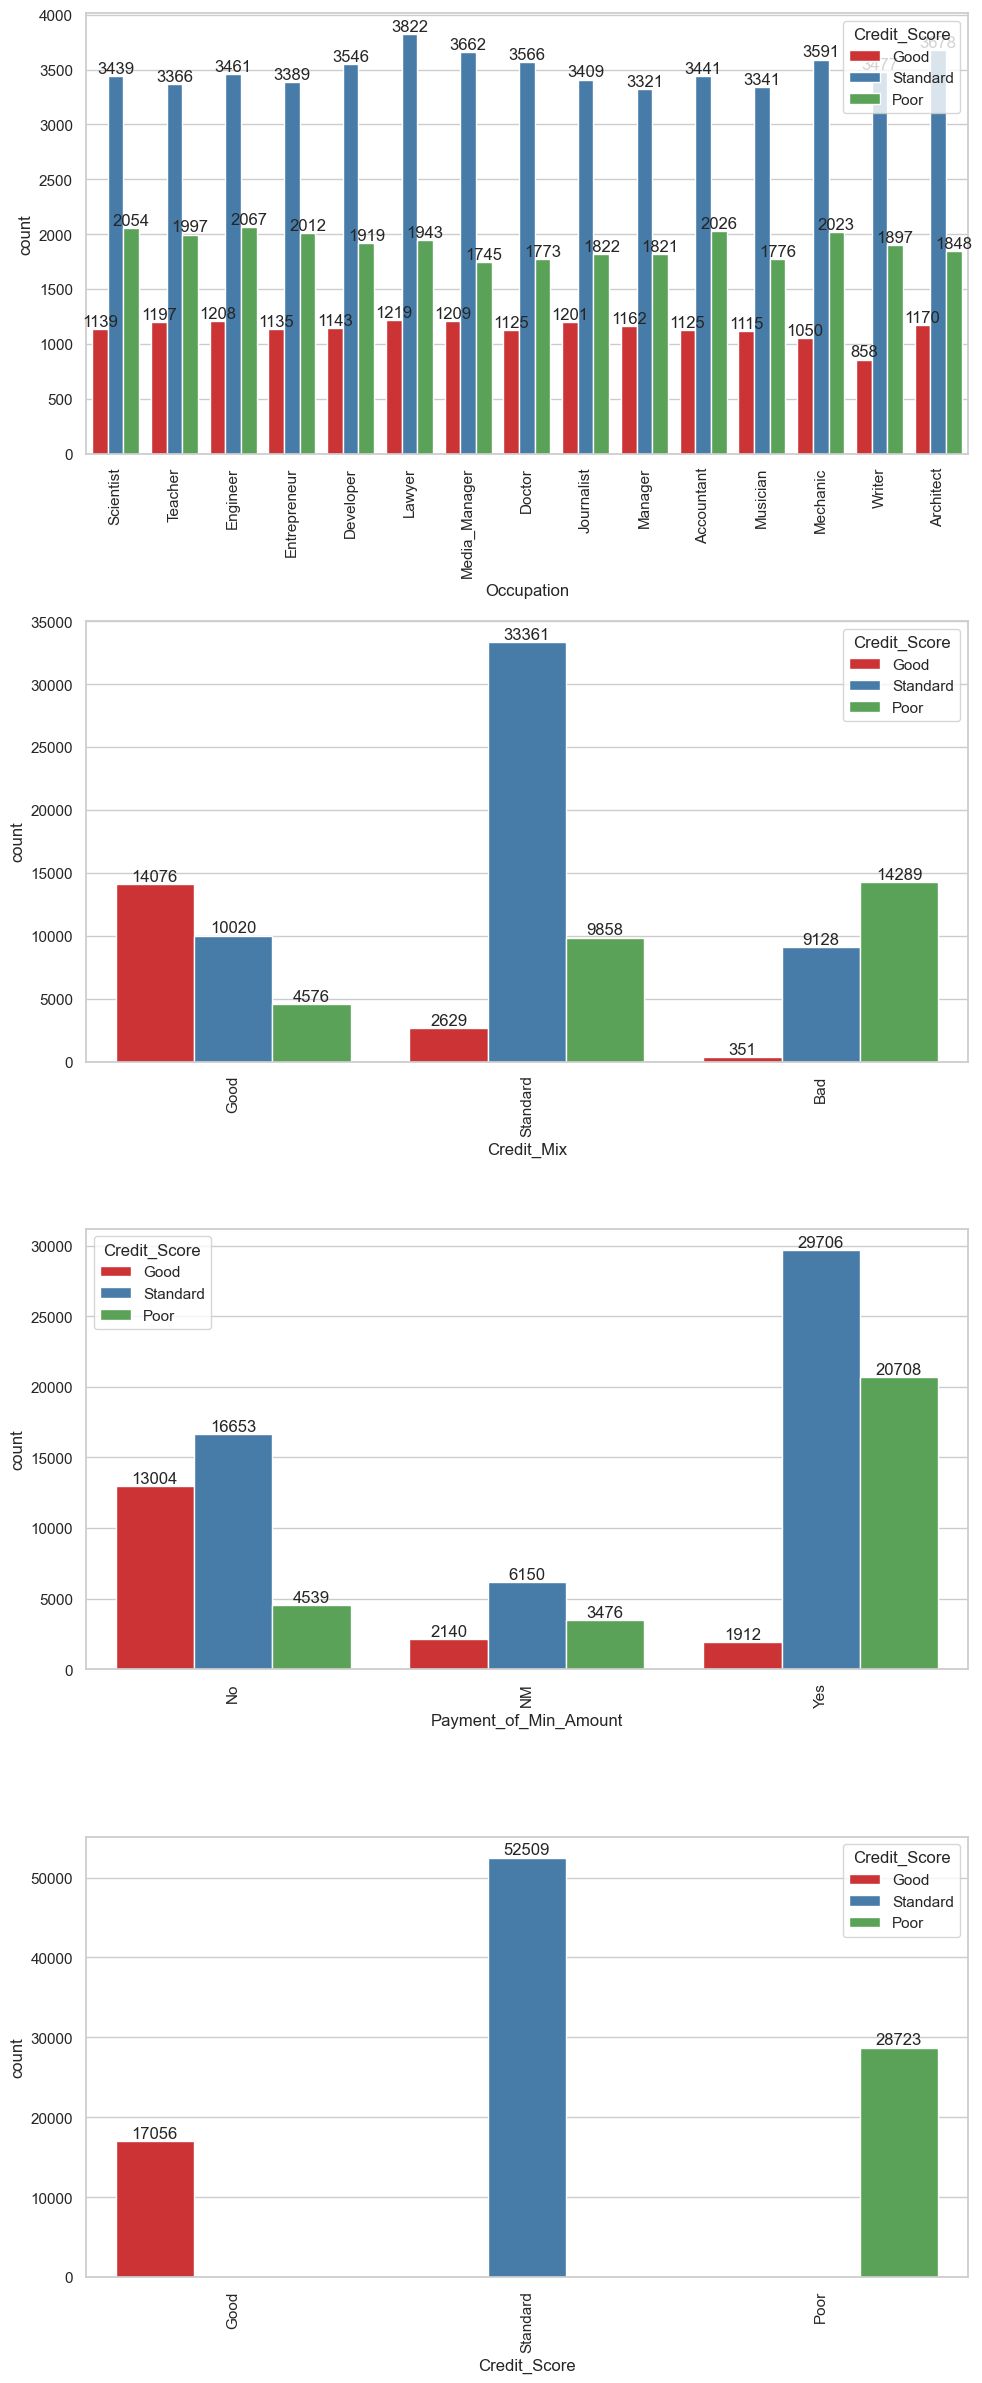

In [7]:
fig, axes = plt.subplots(len(df_categorical.columns ), 1, figsize=(10, 24))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categorical.columns[i], hue=df_categorical.Credit_Score, data=df_categorical, ax=ax, palette = "Set1")
        for i in ax.containers:
            g.bar_label(i)
fig.tight_layout();

### Payment of Min_Amount feature

In [8]:
# Checking the value counts of Payment_of_Min_Amount

df.Payment_of_Min_Amount.value_counts()

Yes    52326
No     34196
NM     11766
Name: Payment_of_Min_Amount, dtype: int64

In [9]:
# Replacing the "NM" with np.nan
df.Payment_of_Min_Amount.replace("NM", np.nan, inplace=True)

In [10]:
df.Payment_of_Min_Amount.value_counts(dropna=False)

Yes    52326
No     34196
NaN    11766
Name: Payment_of_Min_Amount, dtype: int64

In [11]:
# Checking the value counts of Payment_of_Min_Amount column by grouping Customer_ID

df.groupby("Customer_ID")["Payment_of_Min_Amount"].value_counts(dropna=False).head()

Customer_ID  Payment_of_Min_Amount
1006         Yes                      8
1007         No                       8
1008         Yes                      7
             NaN                      1
1009         Yes                      8
Name: Payment_of_Min_Amount, dtype: int64

In [12]:
# Filling the null values in Payment_of_Min_Amount column with ffill and bfill method

df["Payment_of_Min_Amount"] = df.groupby("Customer_ID")["Payment_of_Min_Amount"].fillna(method="ffill").fillna(method="bfill")

In [13]:
df.Payment_of_Min_Amount.value_counts(dropna=False)

Yes    59432
No     38856
Name: Payment_of_Min_Amount, dtype: int64

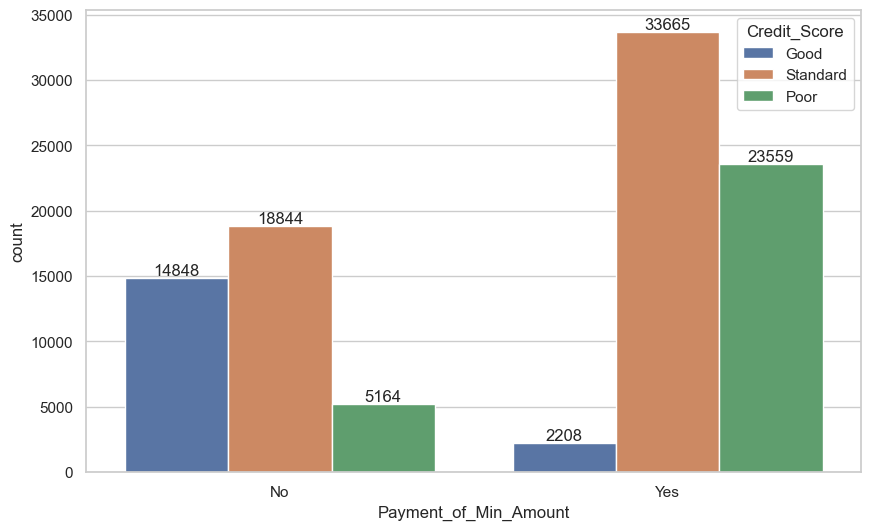

In [14]:
# countplot of Payment_of_Min_Amount column for different Credit_Scores

ax = sns.countplot(x=df.Payment_of_Min_Amount, hue=df.Credit_Score)
for i in ax.containers:
    ax.bar_label(i);

## Can we check the correlation between Credit_Mix and Credit_Score columns using Chi square test?

In machine learning, correlation tests can be used for feature selection. In classification problems where the output variable is categorical and input variables are also categorical, a chi-squared test can be used to know if the input variables are even relevant to the output variable. Therefore we will use chi-squared test to find the relation between Credit_Mix and Credit_Score features.

* Null hypothesis H₀: whether Credit_Mix and Credit_Score are independent
* Alternative hypothesis H₁: whether Credit_Mix and Credit_Score are dependent
* α = 0.05

In [15]:
# create contingency table
data_crosstab = pd.crosstab(df['Credit_Mix'],
                            df['Credit_Score'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['Credit_Mix'].unique()
columns = df['Credit_Score'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 40135.46443448077  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 40135.46443448077  and critical value is: 9.487729036781154
Null Hypothesis is rejected.


After performing the Chi-squared test for Credit_Mix and Credit_Score, we see that there is strong co-dependency for each of these variables. Since highly dependent/correlated variables do not add much relevant new information with regards to the value of the target feature, we will drop Credit_Mix feature from the dataset.

In [16]:
df.drop(columns="Credit_Mix", inplace=True)

## Correlation between numerical features

In [17]:
#Checking the correlation between numerical features
df.corr()

ID  Customer_ID       Age  Annual_Income  \
ID                        1.000000     0.001902  0.003564      -0.005249   
Customer_ID               0.001902     1.000000 -0.003605       0.009305   
Age                       0.003564    -0.003605  1.000000       0.089655   
Annual_Income            -0.005249     0.009305  0.089655       1.000000   
Monthly_Inhand_Salary    -0.005035     0.008871  0.088409       0.997506   
Num_Bank_Accounts         0.005577     0.000004 -0.189415      -0.254645   
Num_Credit_Card          -0.001060    -0.003659 -0.148021      -0.204733   
Interest_Rate             0.003710    -0.003164 -0.217333      -0.280098   
Num_of_Loan              -0.010481     0.015075 -0.213946      -0.243402   
Delay_from_due_date      -0.005079     0.005281 -0.173442      -0.228129   
Num_of_Delayed_Payment    0.001218     0.005266 -0.184094      -0.248653   
Changed_Credit_Limit      0.008296     0.000647 -0.155634      -0.155246   
Num_Credit_Inquiries     -0.002653     0.000841 -0.252858      -0.264999   
Outstanding_Debt          0.003108     0.004682 -0.203290      -0.259826   
Credit_Utilization_Ratio -0.005325    -0.002022  0.024477       0.155951   
Credit_History_Age       -0.009936    -0.014311  0.232573       0.250774   
Total_EMI_per_month      -0.005929     0.019191 -0.078627       0.443443   
Amount_invested_monthly  -0.006645     0.010352  0.055061       0.617429   
Monthly_Balance           0.002465    -0.003383  0.119687       0.679524   

                          Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                    -0.005035           0.005577   
Customer_ID                            0.008871           0.000004   
Age                                    0.088409          -0.189415   
Annual_Income                          0.997506          -0.254645   
Monthly_Inhand_Salary                  1.000000          -0.253924   
Num_Bank_Accounts                     -0.253924           1.000000   
Num_Credit_Card                       -0.203661           0.441211   
Interest_Rate                         -0.279724           0.580642   
Num_of_Loan                           -0.242031           0.470201   
Delay_from_due_date                   -0.227681           0.557363   
Num_of_Delayed_Payment                -0.248257           0.596786   
Changed_Credit_Limit                  -0.155047           0.324723   
Num_Credit_Inquiries                  -0.264906           0.516736   
Outstanding_Debt                      -0.259514           0.504983   
Credit_Utilization_Ratio               0.156321          -0.062305   
Credit_History_Age                     0.250039          -0.469955   
Total_EMI_per_month                    0.441946           0.113931   
Amount_invested_monthly                0.617835          -0.160041   
Monthly_Balance                        0.681894          -0.284671   

                          Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                              -0.001060       0.003710    -0.010481   
Customer_ID                     -0.003659      -0.003164     0.015075   
Age                             -0.148021      -0.217333    -0.213946   
Annual_Income                   -0.204733      -0.280098    -0.243402   
Monthly_Inhand_Salary           -0.203661      -0.279724    -0.242031   
Num_Bank_Accounts                0.441211       0.580642     0.470201   
Num_Credit_Card                  1.000000       0.496868     0.417180   
Interest_Rate                    0.496868       1.000000     0.557119   
Num_of_Loan                      0.417180       0.557119     1.000000   
Delay_from_due_date              0.478330       0.585606     0.498979   
Num_of_Delayed_Payment           0.422622       0.566468     0.471063   
Changed_Credit_Limit             0.250433       0.362035     0.367888   
Num_Credit_Inquiries             0.460157       0.631431     0.565564   
Outstanding_Debt                 0.490374       0.627692     0.638982   
Credit_Utilizat

In [18]:
# Checking the correlation between numerical features by grouping Credit_Score

df.drop(columns=["ID","Customer_ID","Age"]).groupby("Credit_Score").corr()

Annual_Income  Monthly_Inhand_Salary  \
Credit_Score                                                                  
Good         Annual_Income                  1.000000               0.996753   
             Monthly_Inhand_Salary          0.996753               1.000000   
             Num_Bank_Accounts             -0.117650              -0.121153   
             Num_Credit_Card               -0.054992              -0.056840   
             Interest_Rate                 -0.061771              -0.066544   
             Num_of_Loan                   -0.062550              -0.062277   
             Delay_from_due_date           -0.079797              -0.086107   
             Num_of_Delayed_Payment        -0.129059              -0.133103   
             Changed_Credit_Limit          -0.063285              -0.064154   
             Num_Credit_Inquiries          -0.060267              -0.064974   
             Outstanding_Debt              -0.070605              -0.072718   
             Credit_Utilization_Ratio       0.169579               0.170097   
             Credit_History_Age             0.038720               0.040027   
             Total_EMI_per_month            0.470209               0.468146   
             Amount_invested_monthly        0.613745               0.612349   
             Monthly_Balance                0.642865               0.645940   
Poor         Annual_Income                  1.000000               0.997107   
             Monthly_Inhand_Salary          0.997107               1.000000   
             Num_Bank_Accounts             -0.265913              -0.264786   
             Num_Credit_Card               -0.175498              -0.173756   
             Interest_Rate                 -0.306933              -0.307134   
             Num_of_Loan                   -0.227577              -0.226344   
             Delay_from_due_date           -0.171315              -0.170499   
             Num_of_Delayed_Payment        -0.243997              -0.243314   
             Changed_Credit_Limit          -0.103260              -0.104781   
             Num_Credit_Inquiries          -0.279873              -0.279478   
             Outstanding_Debt              -0.253023              -0.252939   
             Credit_Utilization_Ratio       0.127740               0.128320   
             Credit_History_Age             0.274045               0.274153   
             Total_EMI_per_month            0.515780               0.512881   
             Amount_invested_monthly        0.604565               0.605695   
             Monthly_Balance                0.649765               0.653968   
Standard     Annual_Income                  1.000000               0.997791   
             Monthly_Inhand_Salary          0.997791               1.000000   
             Num_Bank_Accounts             -0.192758              -0.192740   
             Num_Credit_Card               -0.151844              -0.152031   
             Interest_Rate                 -0.213117              -0.213666   
             Num_of_Loan                   -0.208190              -0.207844   
             Delay_from_due_date           -0.186672              -0.187042   
             Num_of_Delayed_Payment        -0.192325              -0.192511   
             Changed_Credit_Limit          -0.159918              -0.159588   
             Num_Credit_Inquiries          -0.209746              -0.210608   
             Outstanding_Debt              -0.218094              -0.218807   
             Credit_Utilization_Ratio       0.155718               0.156012   
             Credit_History_Age             0.206841               0.206810   
             Total_EMI_per_month            0.454516               0.452731   
             Amount_invested_monthly        0.608288               0.609494   
             Monthly_Balance                0.681486               0.683463   

                                       Num_Bank_Accounts  Num_Credit_Card  \
Credit_Scor

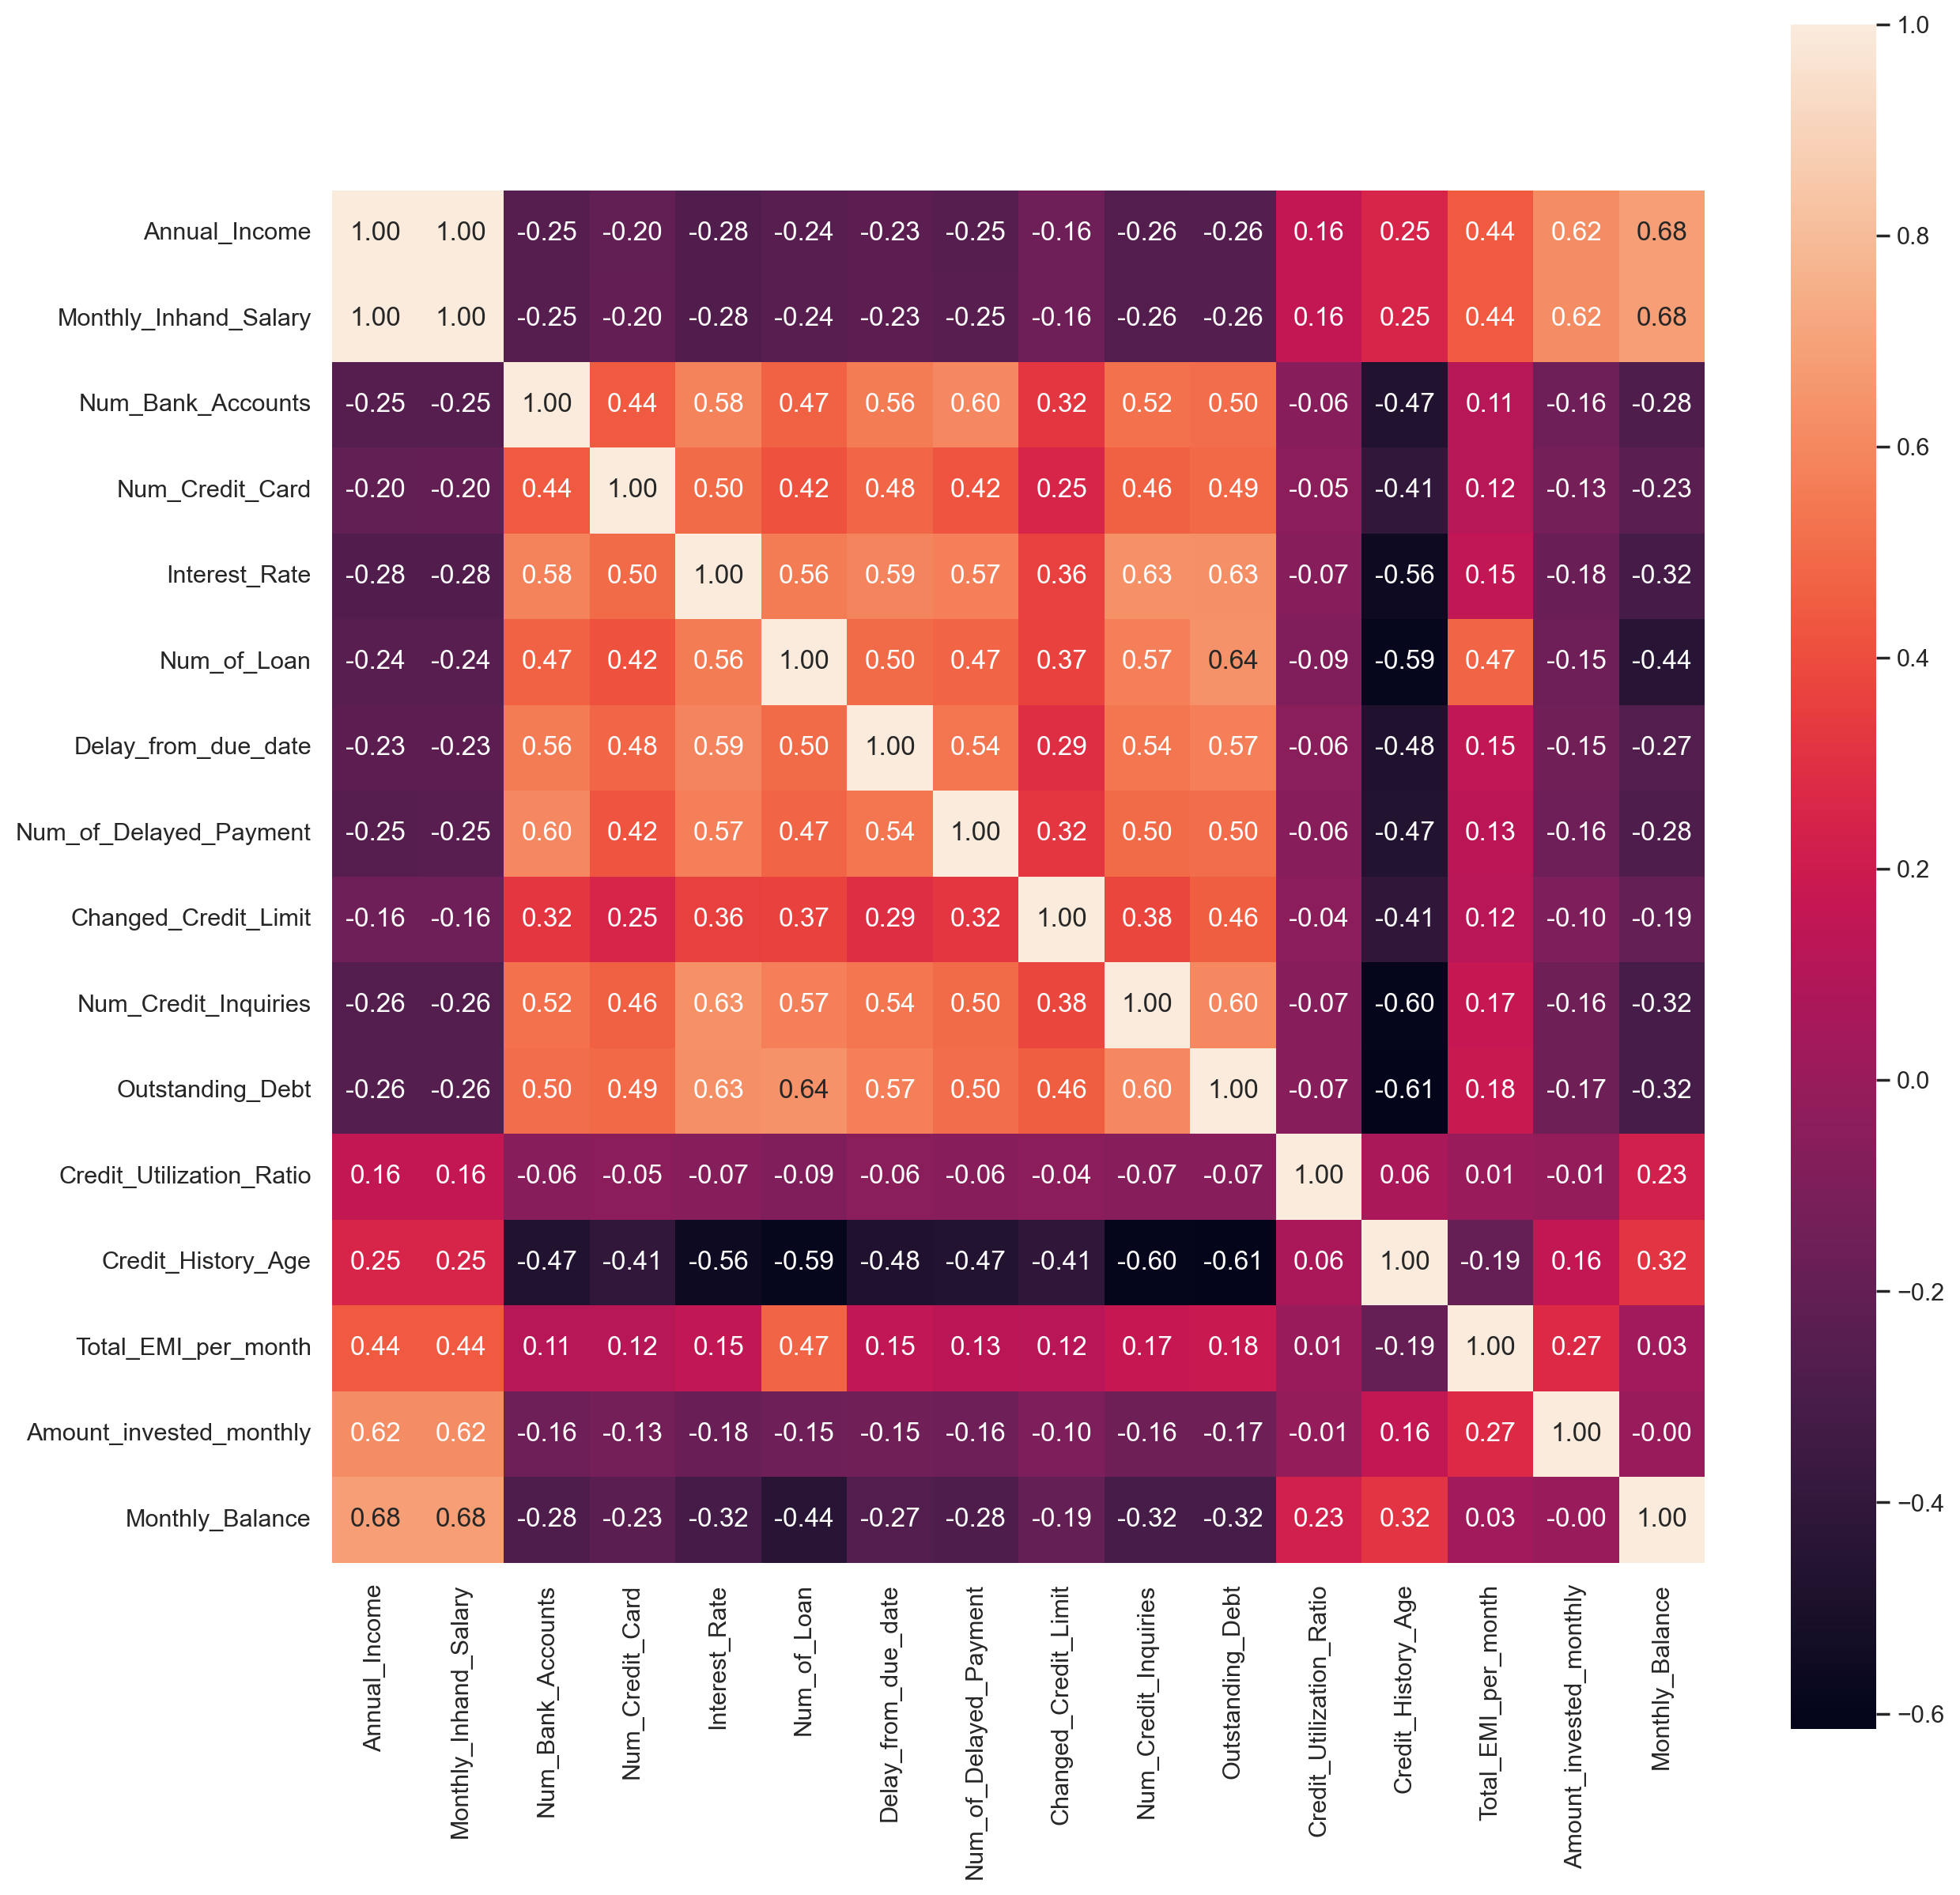

In [19]:
# Heatmap for the correlation between numerical features for all Credit_Score

plt.figure(figsize=(14,14),dpi=200)
sns.heatmap(df.drop(columns=["ID","Customer_ID","Age"]).corr(), square=True, annot=True, fmt=".2f");

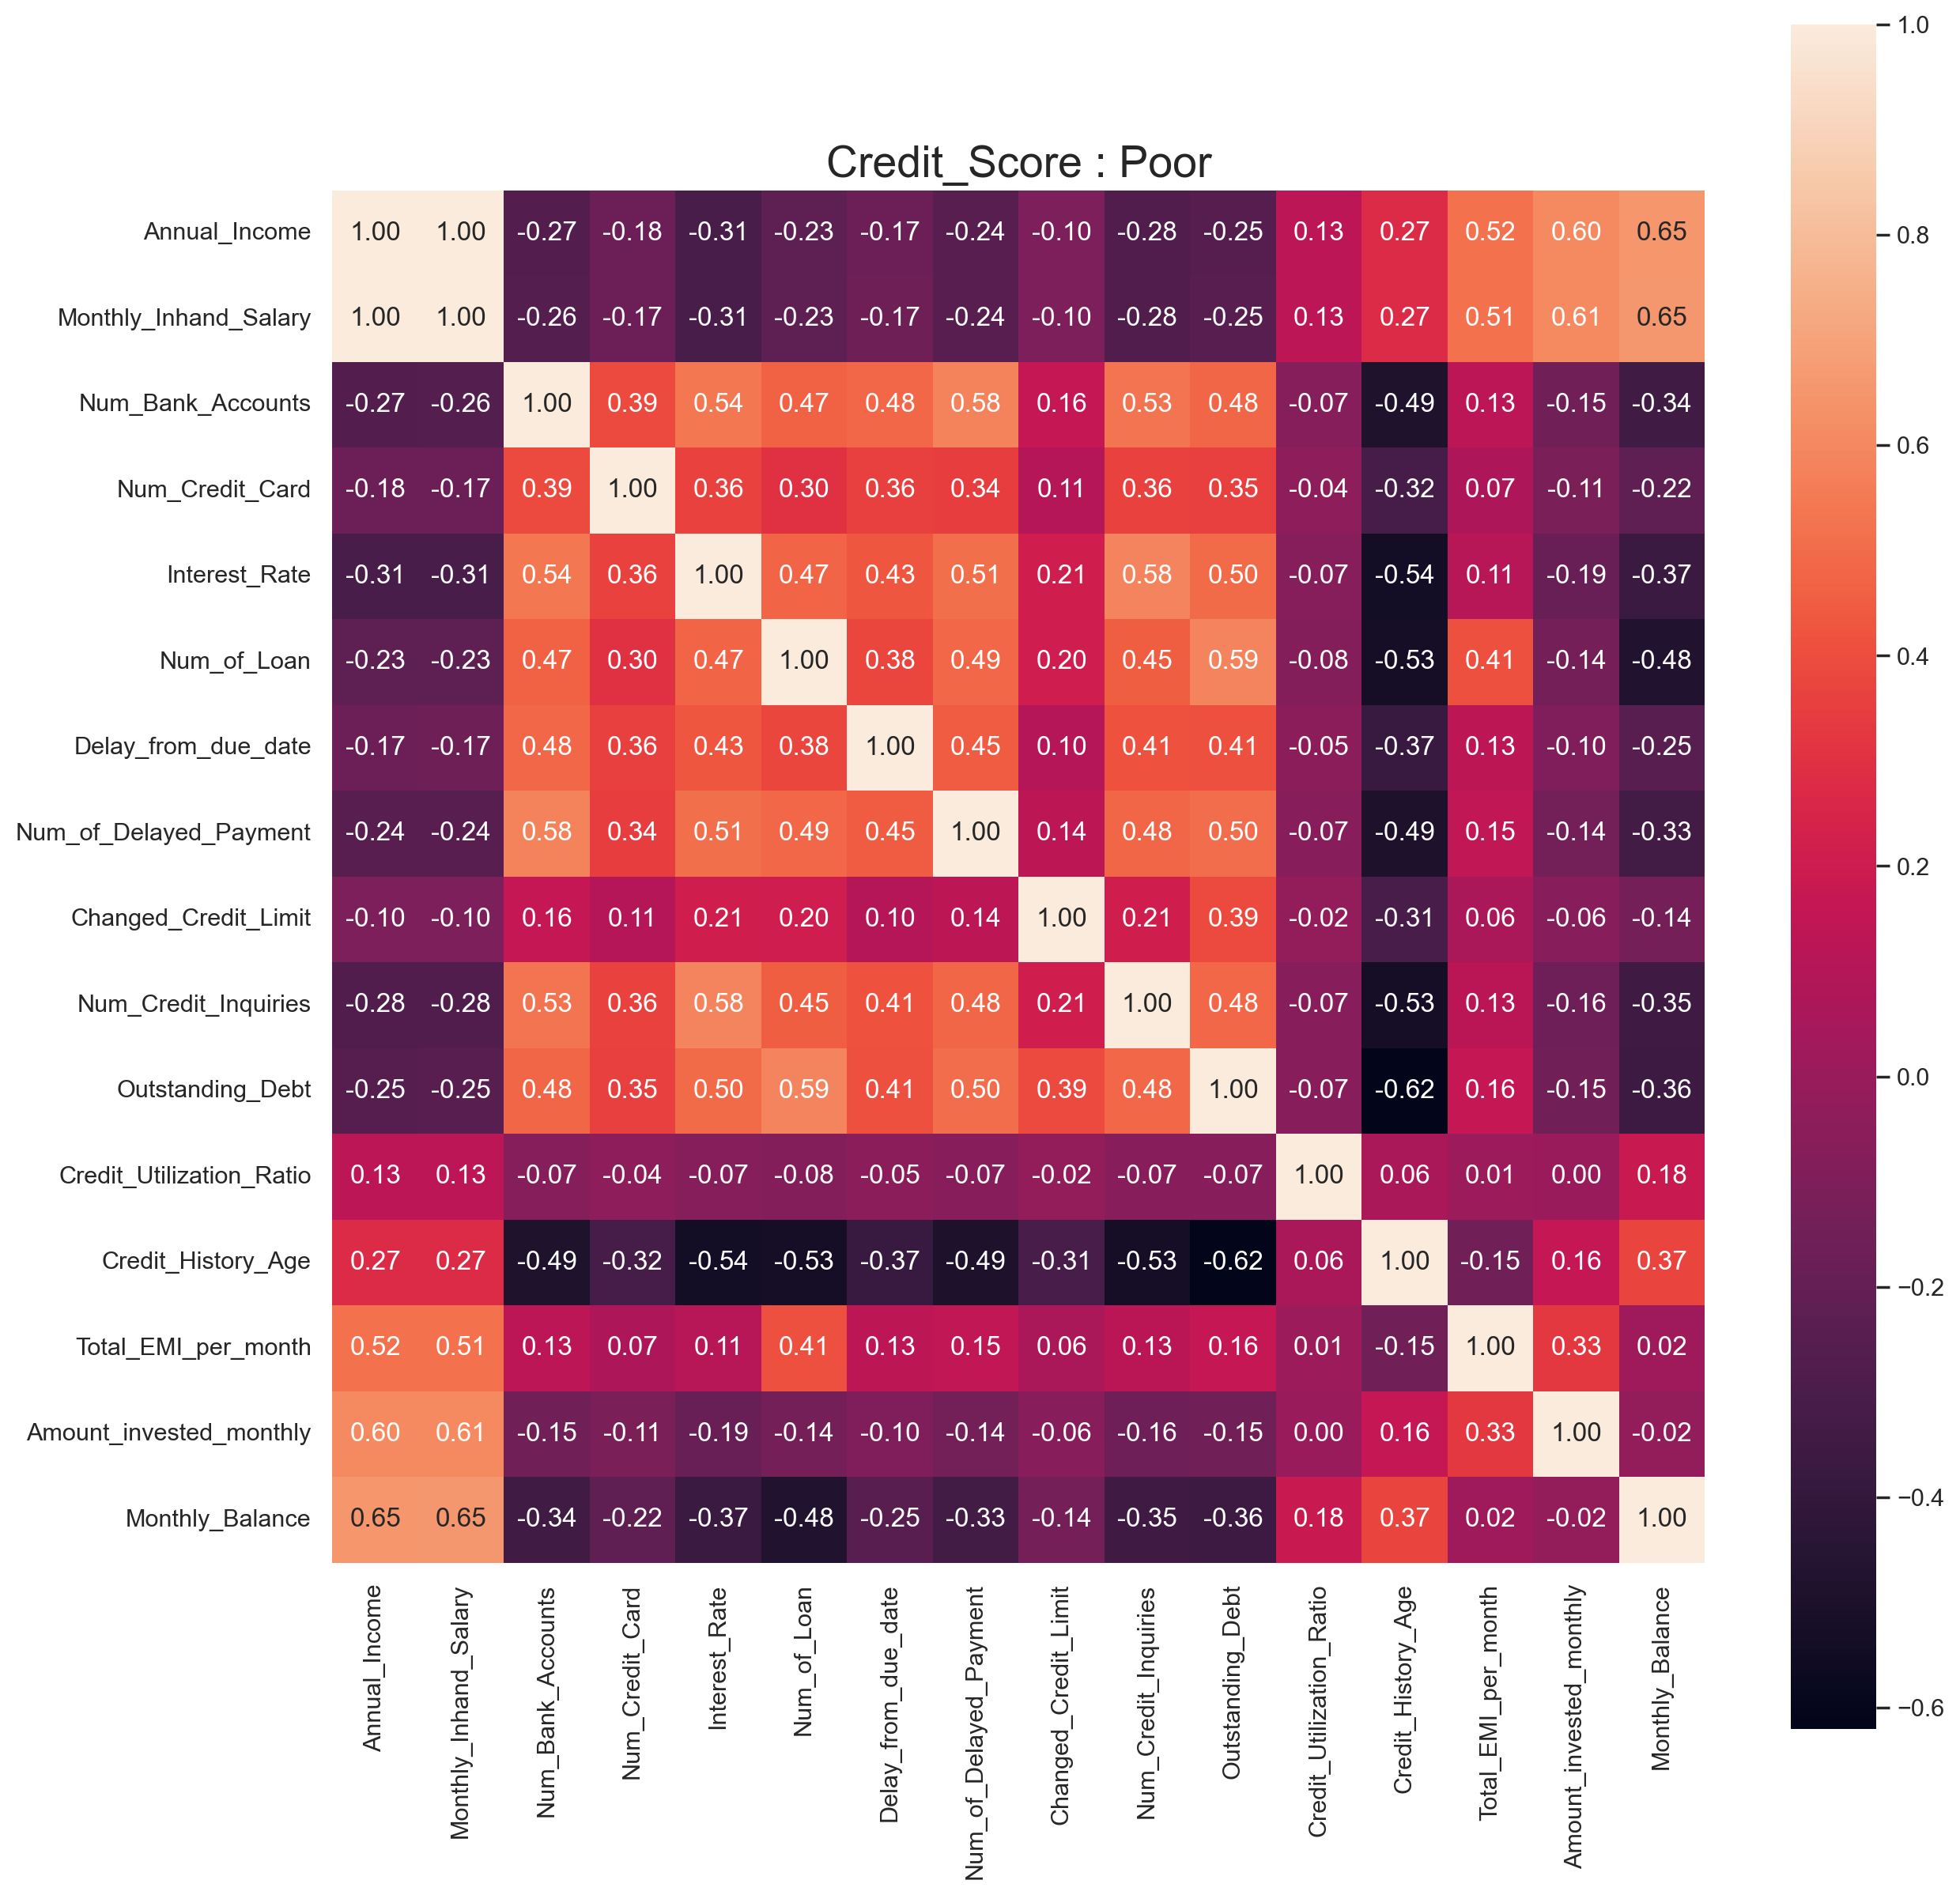

In [20]:
# Heatmap for the correlation between numerical features for Poor Credit_Score

plt.figure(figsize=(14,14),dpi=200)
sns.heatmap(df.drop(columns=["ID","Customer_ID","Age"])[df.Credit_Score=="Poor"].corr(), square=True, annot=True, fmt=".2f");
plt.title("Credit_Score : Poor", fontsize=20);

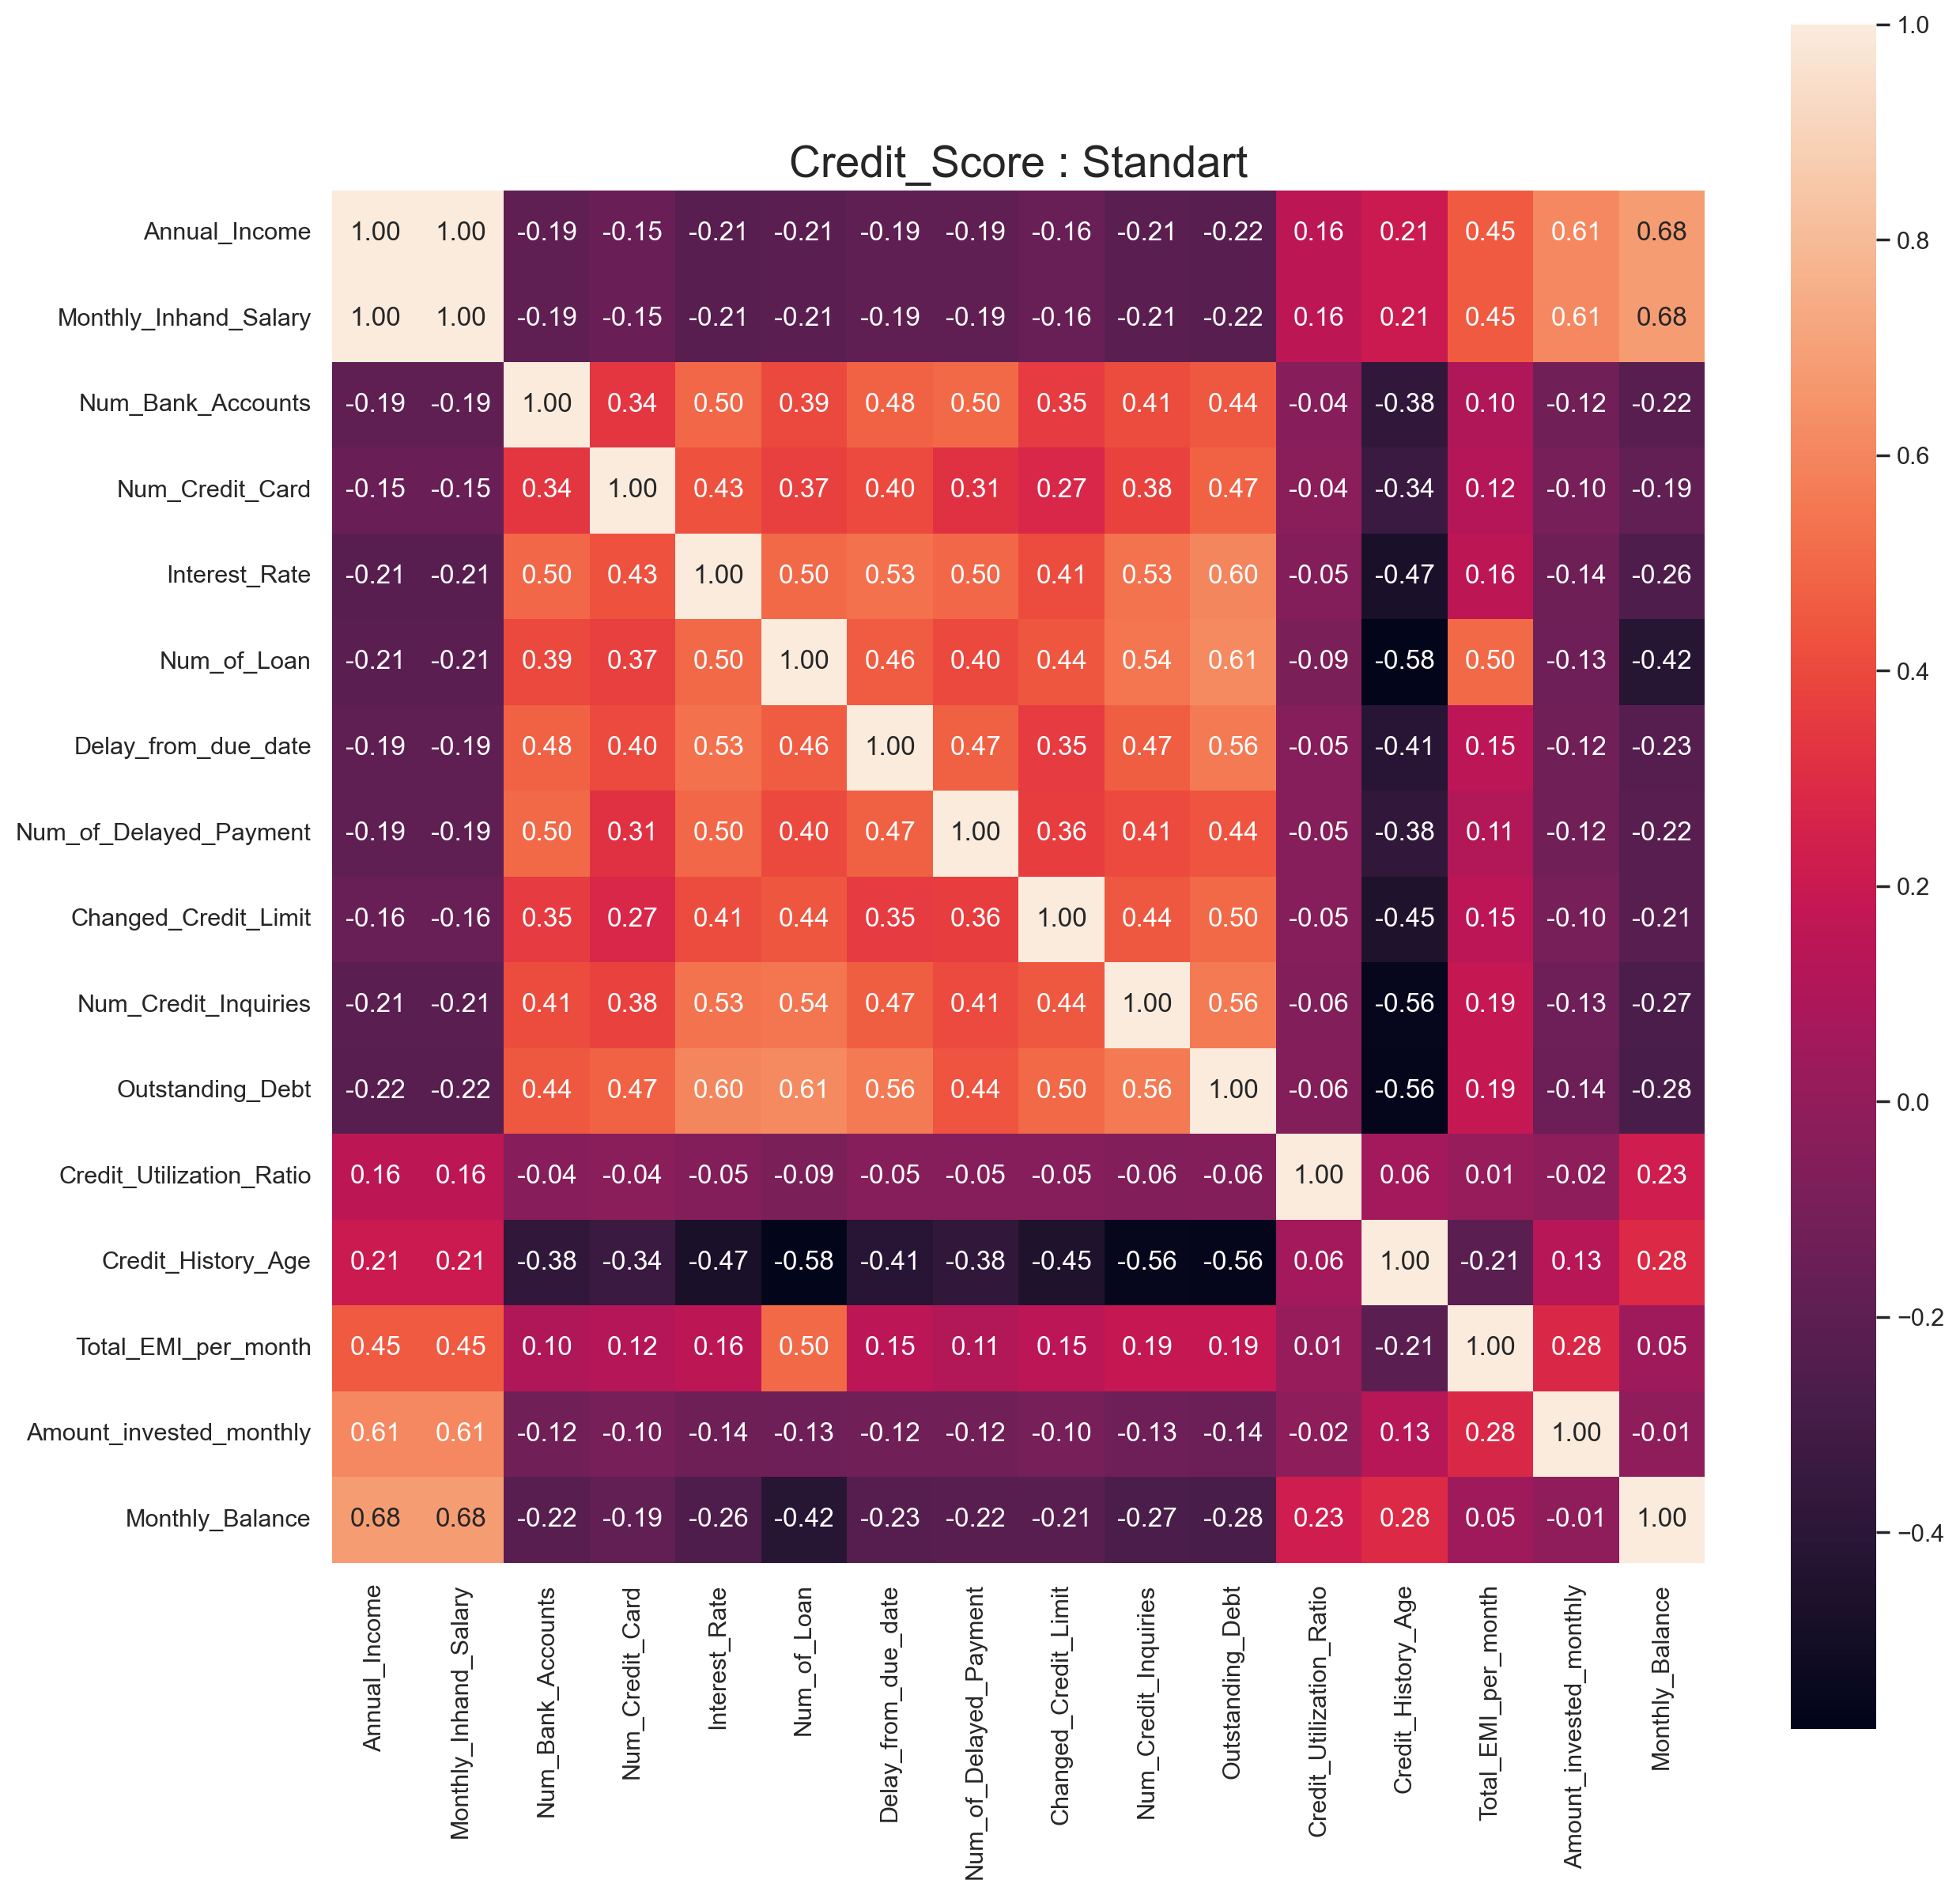

In [21]:
# Heatmap for the correlation between numerical features for Standard Credit_Score

plt.figure(figsize=(14,14),dpi=200)
sns.heatmap(df.drop(columns=["ID","Customer_ID","Age"])[df.Credit_Score=="Standard"].corr(), square=True, annot=True, fmt=".2f");
plt.title("Credit_Score : Standart", fontsize=20);

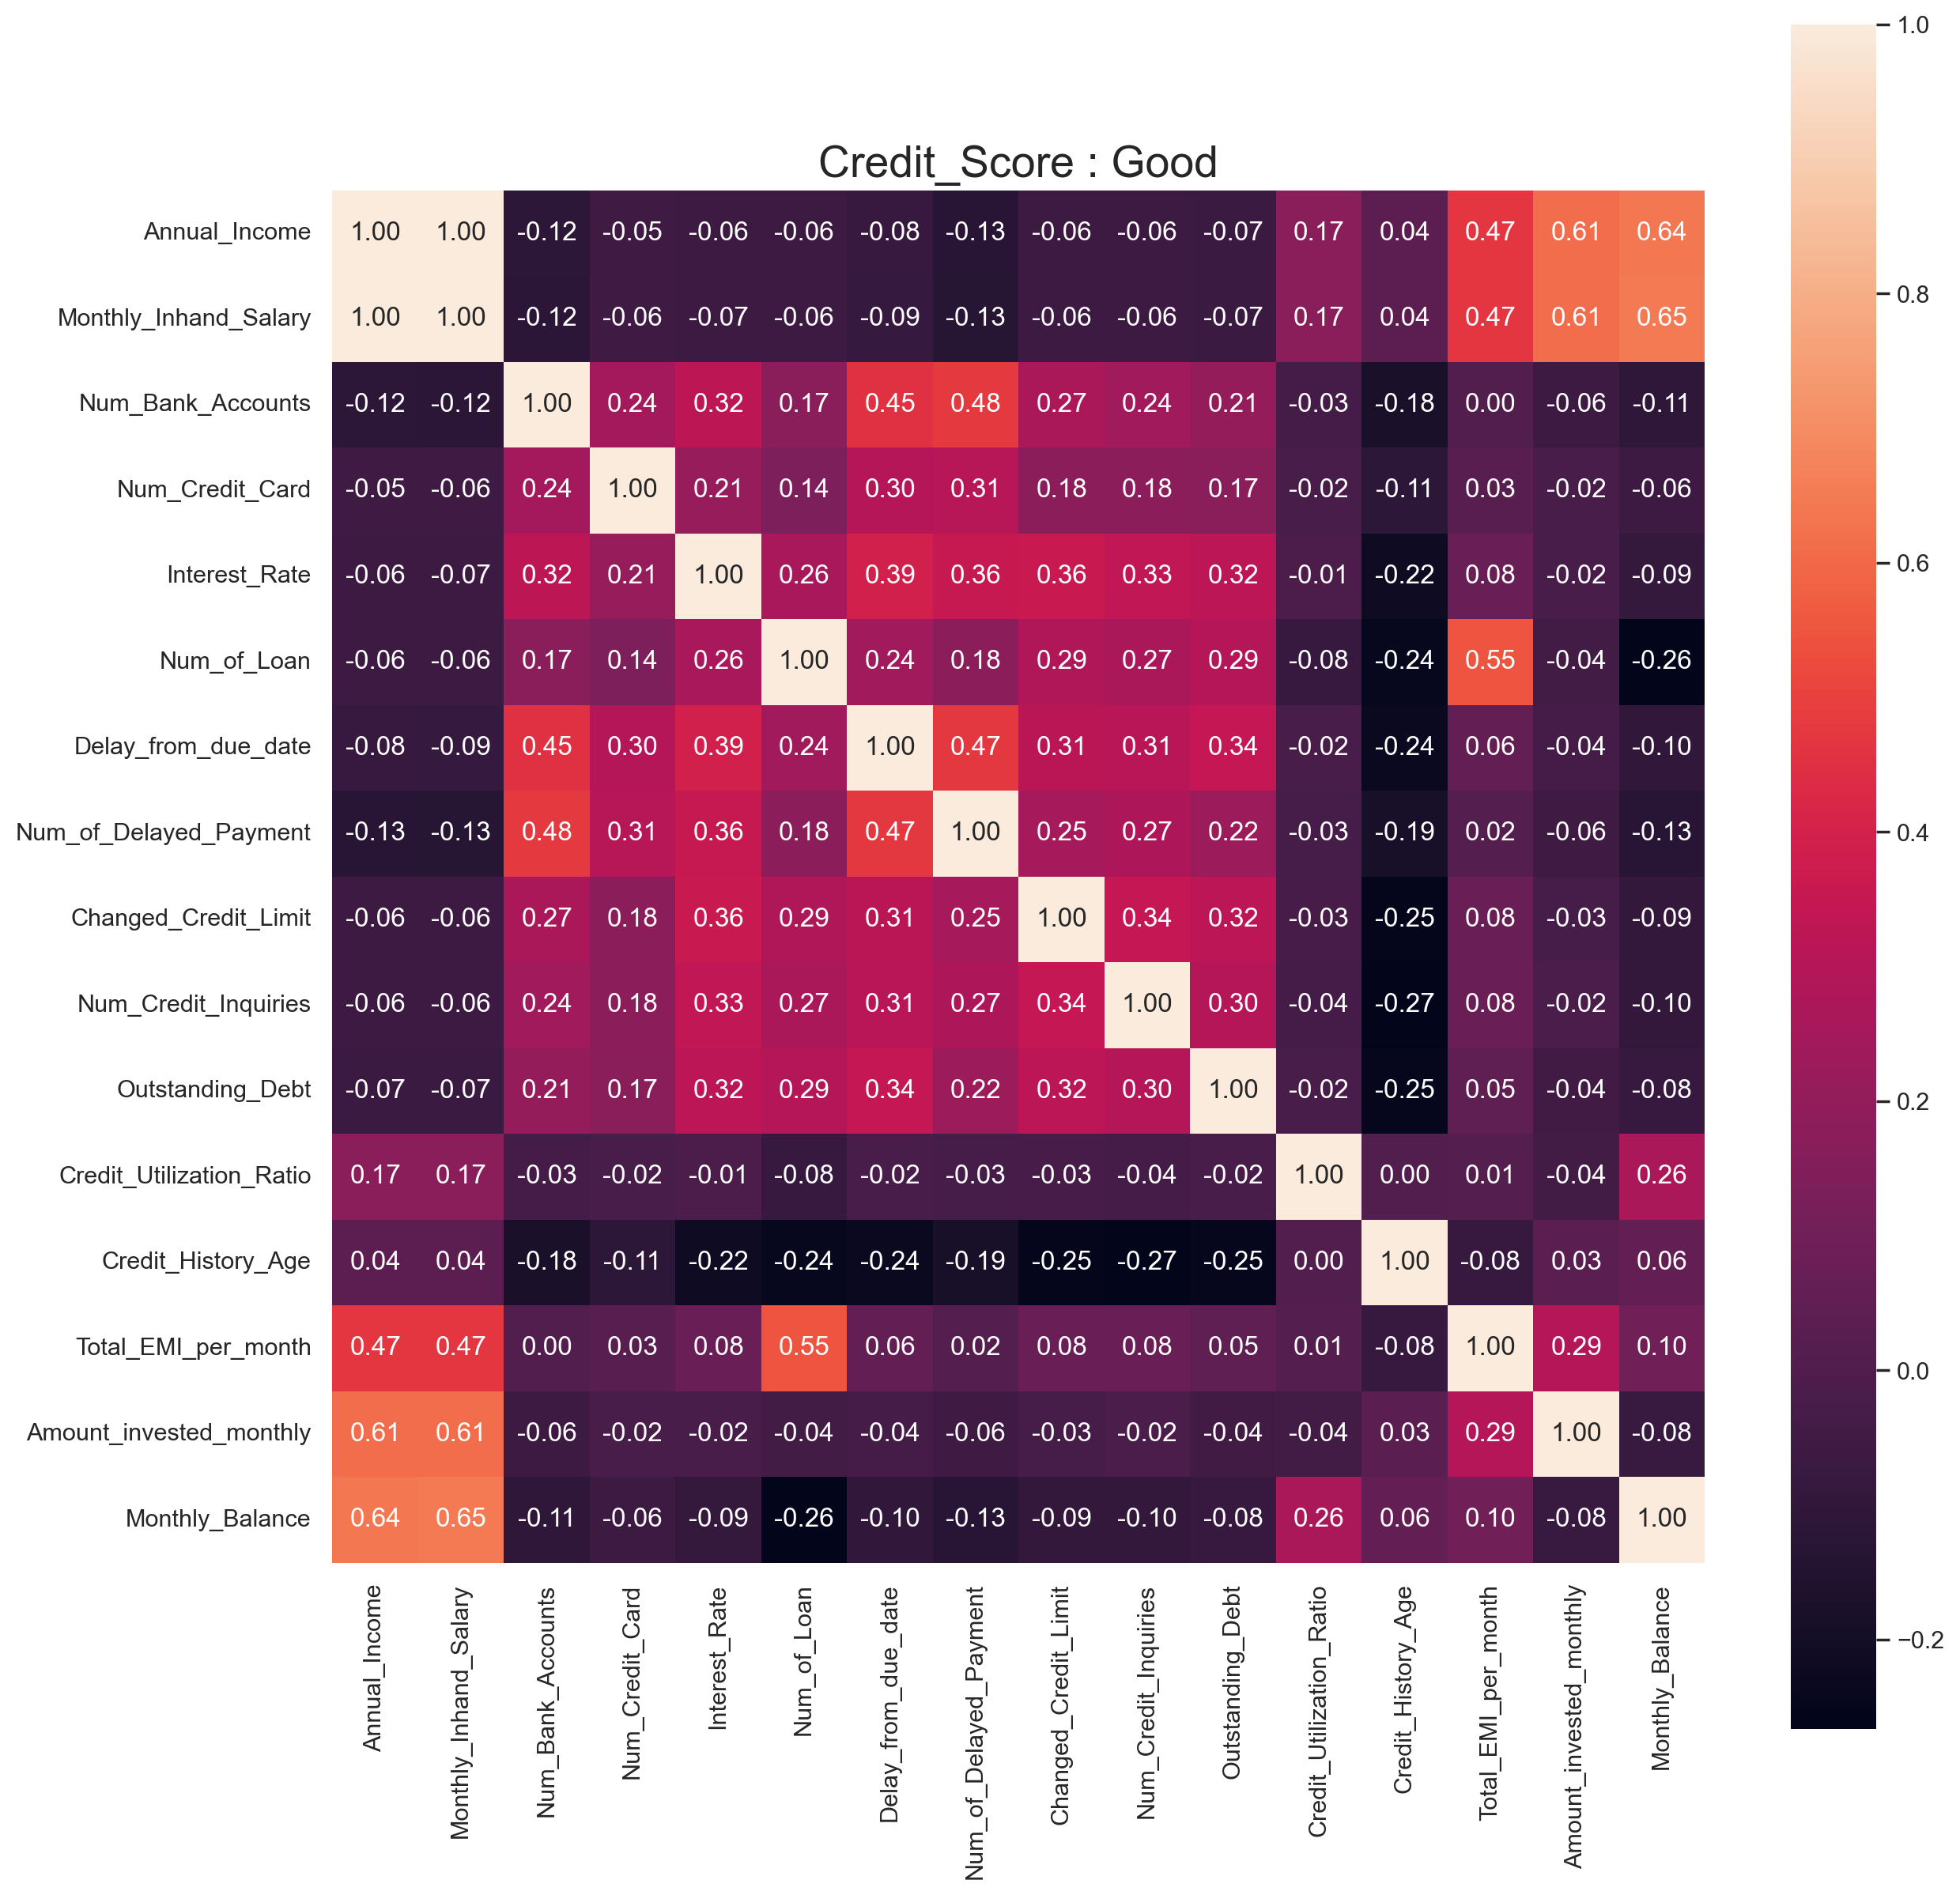

In [22]:
# Heatmap for the correlation between numerical features for Good Credit_Score

plt.figure(figsize=(14,14),dpi=200)
sns.heatmap(df.drop(columns=["ID","Customer_ID","Age"])[df.Credit_Score=="Good"].corr(), square=True, annot=True, fmt=".2f");
plt.title("Credit_Score : Good", fontsize=20);

### Conclusion about correlation between numerical features

When we compared the correlation between numerical features for different Credit_Scores, it can be concluded that;

* There are strongly positive correlation between Annual_Income and Monthly_Inhand_Salary for all Credit_Score values. Therefore one of them can be dropped for further analysis.
* The correlation between Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt and Annual_Income/Monthly_Inhand_Salary is weakly negative. Also it decreases with changing Credit_Score from Poor to Good.
* The correlation between Credit_Utilization_Ratio and Annual_Income/Monthly_Inhand_Salary is weakly positive and it increases with changing Credit_Score from Poor to Good.
* The correlation between Credit_History_Age and Annual_Income/Monthly_Inhand_Salary is weakly positive and it decreases with changing Credit_Score from Poor to Good.
* The correlation between Total_EMI_per_month and Annual_Income/Monthly_Inhand_Salary is moderately positive and it decreases with changing Credit_Score from Poor to Good.
* The correlation between Amount_invested_monthly and Annual_Income is moderately positive and it is same for the Credit_Score Poor and Standar, but it is decreasing in Good Credit_Score.
* The correlation between Amount_invested_monthly and Monthly_Inhand_Salary is moderately positive and it is almost the same for the Poor, Standar and Good Credit_Scores.
* The correlation between Monthly_Balance and Annual_Income/Monthly_Inhand_Salary is moderately positive and it is decreasing from the Poor to Good Credit_Scores.
* The correlation between Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt and Num_Bank_Accounts is moderately positive and it is decreasing from the Poor to Good Credit_Scores.
* The correlation between Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt and Num_Credit_Card is moderately positive and it is increasing from the Poor to Standart Credit_Score but decreasing from Standart to Good Credit_Score.
* The correlation between Num_Bank_Accounts, Num_of_Delayed_Payment, Num_Credit_Inquiries and Interest_Rate  is moderately positive and decreasing from Poor to Good Credit_Score.
* The correlation between Outstanding_Debt and Interest_Rate is moderately positive and decreasing from Poor to Good Credit_Score. Although it increases slightly when Credit_Score changes from Poor to Standard, it decreases significantly when Credit_Score changes from Standard to Good.
* The correlation between Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt and Num_of_Loan are moderately positive and it decreases when Credit_Score changes from Standart to Good.
* The correlation between Delay_from_due_date, Num_of_Delayed_Payment and Num_Bank_Accounts is moderately positive and it is decreases when Credit_Score changes from Poor to Good.
* The correlation between Delay_from_due_date and Num_of_Delayed_Payment is moderately positive and it is almost the same for all Credit_Scores.
* The correlation between Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment and Outstanding_Debt is moderately positive and it decreases when Credit_Score changes from Poor to Good.
* The correlation between Num_of_Loan and Total_EMI_per_month is moderately positive and it increases when Credit_Score changes from Poor to Good.
* There are moderately positive correlation between Annual_Income, Monthly_Inhand_Salary and Total_EMI_per_month and it decreases when Credit_Score changes from Poor to Good.
* There are moderately positive correlation between Annual_Income, Monthly_Inhand_Salary and Amount_invested_monthly and it is almost the same for all Credit_Scores.
* There are moderately positive correlation between Annual_Income, Monthly_Inhand_Salary and Monthly_Balance and it decreases when Credit_Score changes from Poor to Good.

In [23]:
df.drop(columns="Monthly_Inhand_Salary", inplace=True)

## Dropping unnecessary features

**Since ID, Customer_ID, Month, Name, SSN columns will not add much relevant new information with regards to the value of target feature, we will drop these features from the dataset.**

In [24]:
df.drop(columns=["ID", "Customer_ID", "Month", "Name", "SSN"], inplace=True)

In [25]:
df.shape

(98288, 19)

## <p style="background-color:#7da6ff; font-family:arial; color:#09042b; font-size:175%; text-align:center; border-radius:10px 10px;">Final Evaluation of Data via Graphs After Handling With Outliers</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#09042b; background-color:#7da6ff" data-toggle="popover">Content</a>

## Let's check the distribution of numerical features

In [26]:
df_numeric = df.select_dtypes(exclude="O")

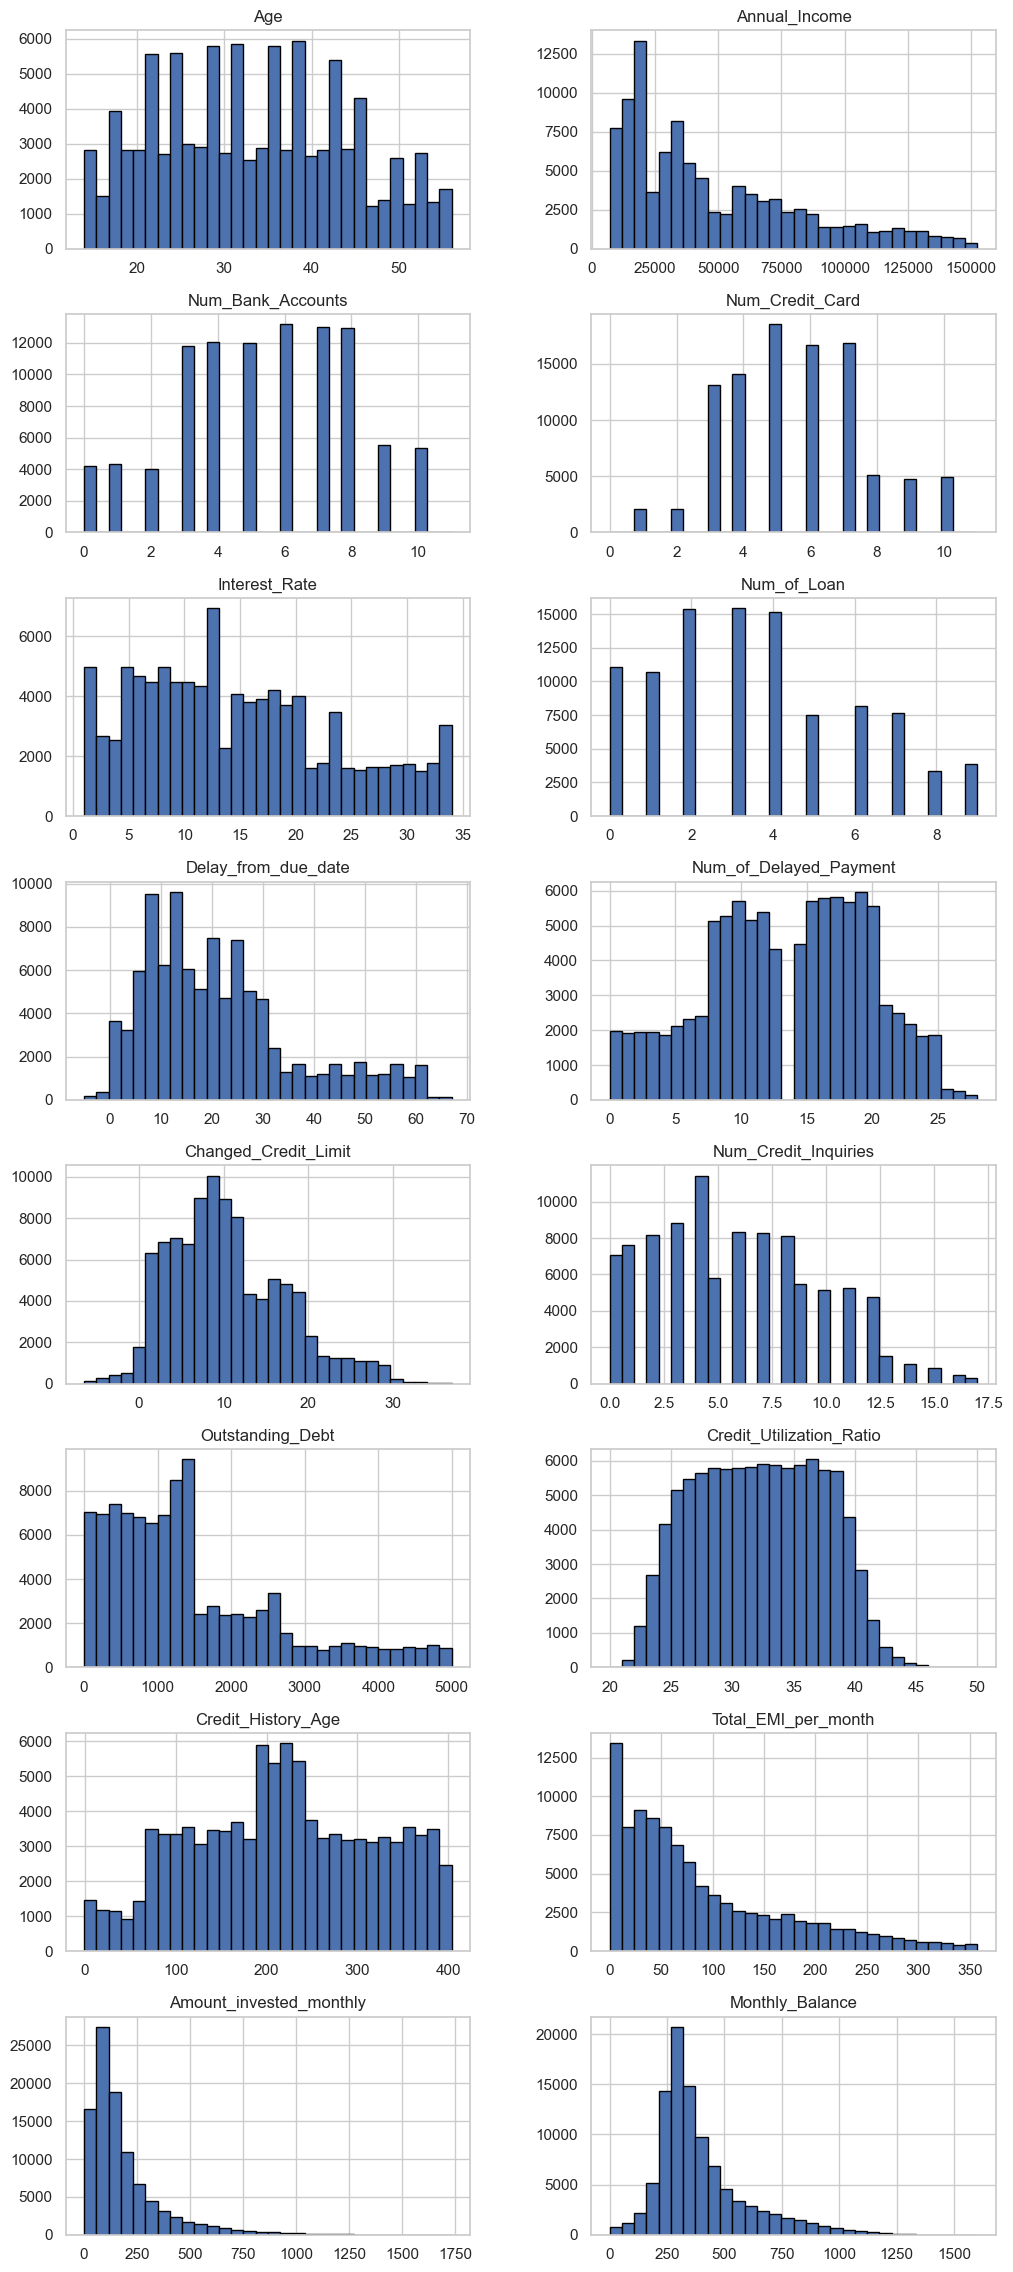

In [27]:
fig_ = df_numeric.hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");

## Let's check the boxplots for numerical features for different Credit Scores

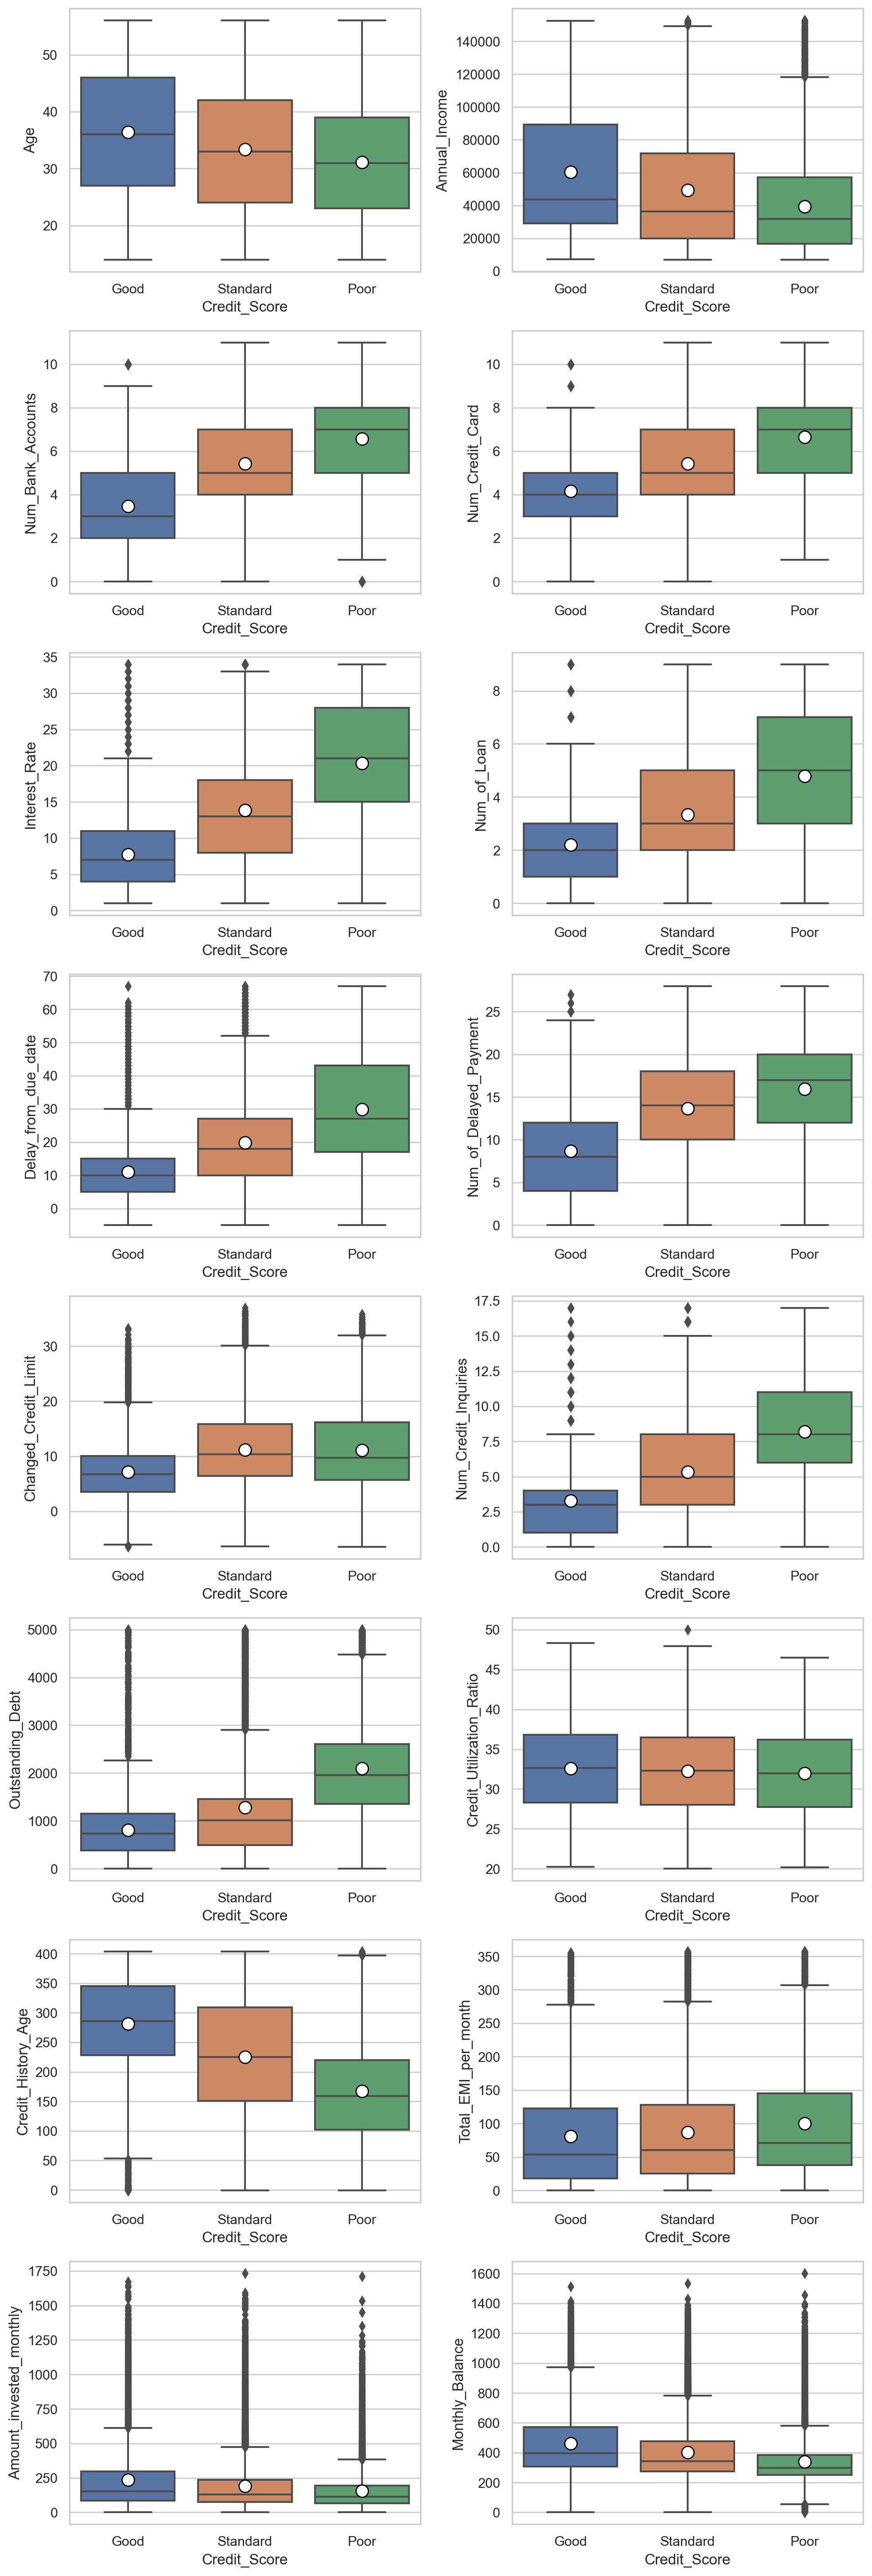

In [28]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df.select_dtypes(exclude="O").columns):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "Credit_Score", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

**Conclusion about boxplots:** Although we have worked on outliers, when we examined on boxplots it seems that we still have extreme values in some features. So, how can we check that?

**``Boxplots``** are a great way to summarize the distribution of a dataset. But they become increasingly inaccurate when the size of a dataset grows. Therefore, **``Letter-Value Plots``** (or boxenplots) have been developed to overcome the problem of an inaccurate representation of outliers in boxplots.

## Let's check the boxenplots for munerical features for different Credit Scores

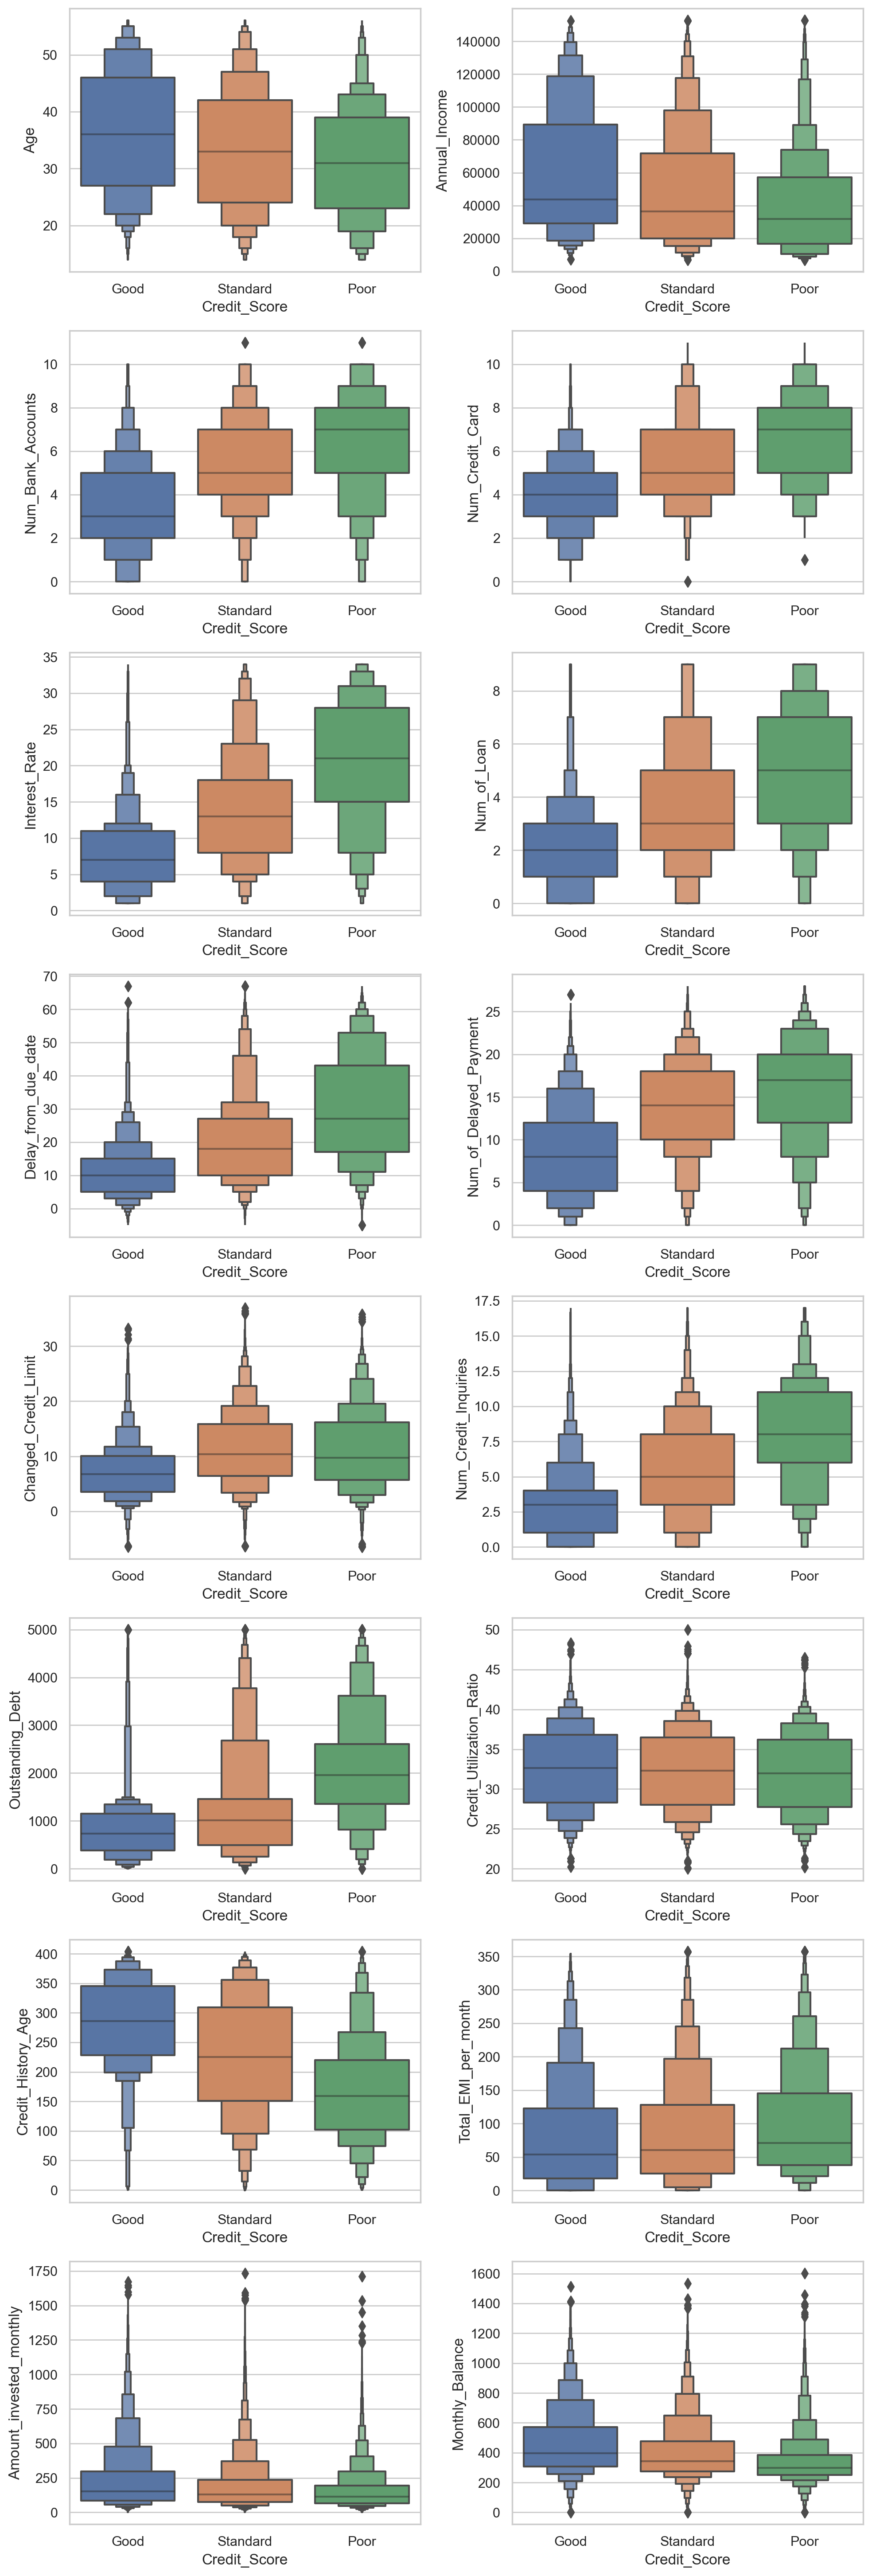

In [29]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df.select_dtypes(exclude="O").columns):
        plt.subplot(10,2,i+1)
        sns.boxenplot(x= "Credit_Score", y=col, data=df)
plt.tight_layout();

**Conclusion about boxenplots:**

We can see that the Boxenplot gives us much more information about the tails of our dataset’s distribution. In the boxplot above, we can’t tell what the data looks like beyond some points of numerical features:

For example, are outstanding debts greater than around 2500 extreme values/outliers❓ 🤔

According to boxplot and within the whiskers, it’s quite hard to grasp what’s going on as well. There’s a pretty big gap between the 75th percentile and maximum value of the Outstanding_Debt.

According to boxplot and within the whiskers, it seems that they are extreme values and some of them are candidates for being outliers. However, it’s quite hard to grasp and decide what they are exactly. There’s a pretty big gap between the 75th percentile and the maximum value.

With respect to Outstanding_Debt, the boxenplot, on the other hand, provides more insights in how the data is distributed beyond the quantiles. Contrary to the output of box plot, it can be assumed that there have been no extreme values.

To wrap up, interpreting boxenplots can be more straightforward. The concept of thicker boxes representing a bigger part of the total population is easier to comprehend and facilitates discussions.

## Let's check the counts of categorical features for different Credit Scores

In [30]:
df_categorical = df.select_dtypes(include="O")

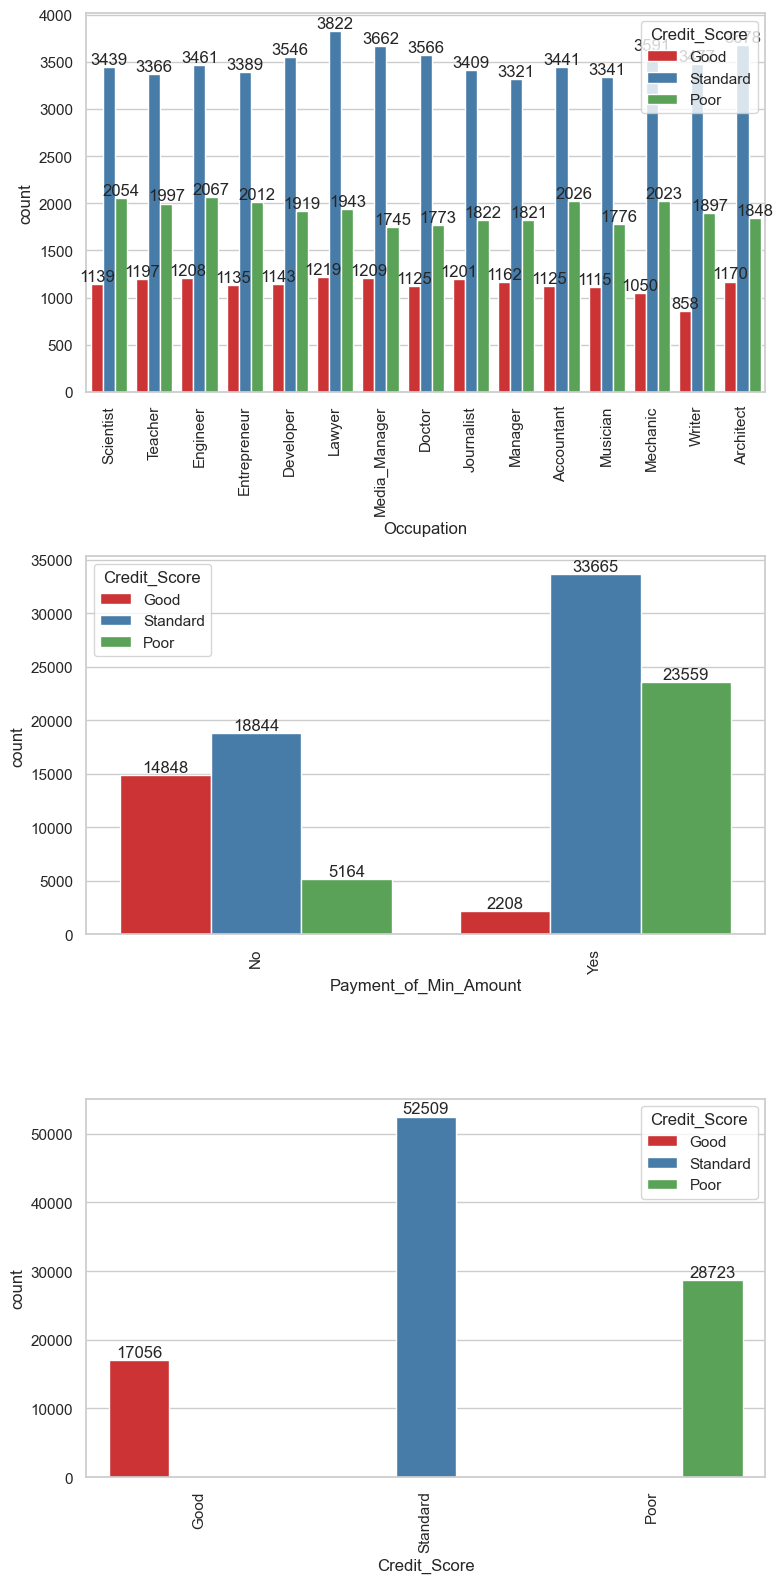

In [31]:
fig, axes = plt.subplots(len(df_categorical.columns ), 1, figsize=(8, 16))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categorical.columns[i], hue=df_categorical.Credit_Score, data=df_categorical, ax=ax, palette = "Set1")
        for i in ax.containers:
            g.bar_label(i)
fig.tight_layout();

## Conclusion about features for different Credit_Scores

* When we compare age values for different Credit_Scores, it can be seen that the credit score improves as the mean and median values of age increase.
* The most of the Customers in the dataset have greater Annual_Income value for Standart and Good credit scores and the credit score improves as the mean/median values of Annual_Income increase.
* The mean/median values of Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt and Total_EMI_per_month features increase as the credit scores change from Good to Poor.
* The mean/median values of Credit_Utilization_Ratio are almost the same for all credit scores.
* The mean/median values of Credit_History_Age decrease as the credit scores change from Good to Poor.
* The mean/median values of Total_EMI_per_month slightly increase as the credit scores change from Good to Poor.
* The mean/median values of Amount_invested_monthly and Monthly_Balance slightly decrease as the credit scores change from Good to Poor.
* The number of customer distributed is almost equally for each occupation in different credit scores. At the good credit score the number of customers is lowest although it is highest at the standart credit score.
* The number of customers having Payment_of_Min_Amount is higher at Poor and Standart credit scores while the number of customers with No Payment_of_Min_Amount is higher at Good credit score.

## <p style="background-color:#7da6ff; font-family:arial; color:#09042b; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#09042b; background-color:#7da6ff" data-toggle="popover">Content</a>

### 1. What is the average age and credit history age of customers by credit score?

In [32]:
df.groupby("Credit_Score")[["Age","Credit_History_Age"]].mean().sort_values(by="Age")

Age  Credit_History_Age
Credit_Score                               
Poor          31.154545          167.448386
Standard      33.399151          225.147994
Good          36.443949          281.680816

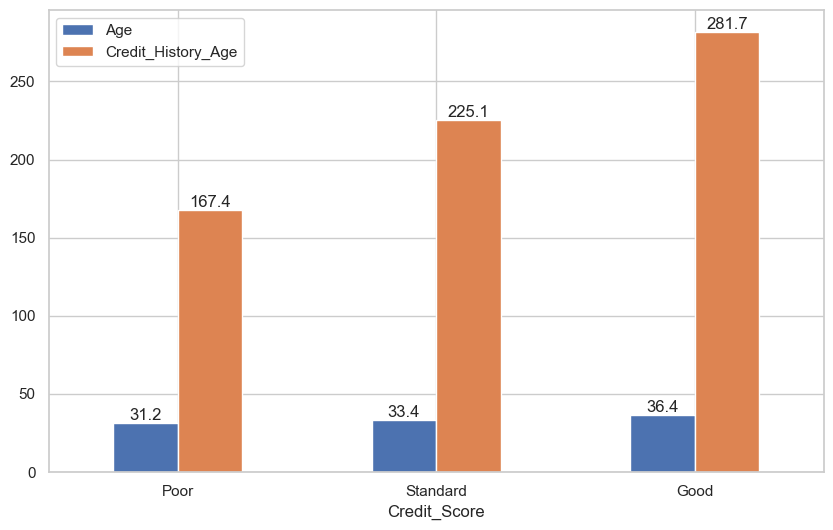

In [33]:
ax = df.groupby("Credit_Score")[["Age","Credit_History_Age"]].mean().sort_values(by="Age").plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);

**Conclusion about Age and Credit_History_Age features by Credit_Score:**

When we compare the Age and Credit_History_Age features for different credit scores, it can be concluded that both of them are lower for Poor credit score. Also credit score improves with the increase in age and credit history age.

### 2. Is there any affect of occupatipn on credit score?

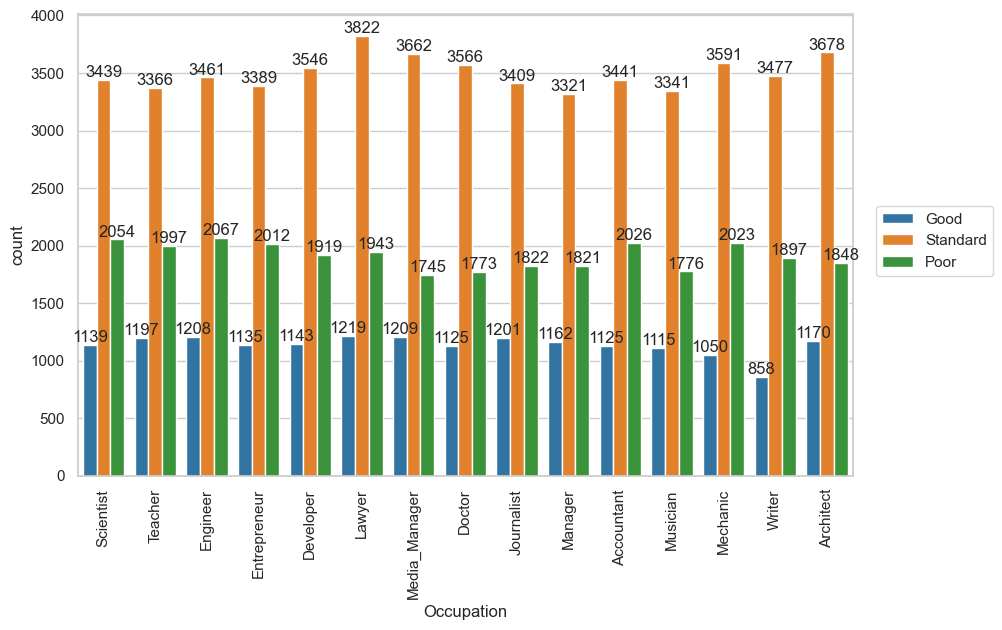

In [34]:
ax = sns.countplot(x=df.Occupation, hue=df.Credit_Score, data=df, palette = "tab10")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.02, 0.6))

for i in ax.containers:
    ax.bar_label(i);


**Conclusion about the effect of occupatipn on credit score:**

As it is seen from the chart above there isn't any significant effect of occupation on credit score.

### 3. What is the average Annual_Income of customers by credit score?

In [35]:
df.groupby("Credit_Score")[["Annual_Income"]].mean().sort_values(by="Annual_Income")

Annual_Income
Credit_Score               
Poor           39359.286863
Standard       49485.912647
Good           60486.860869

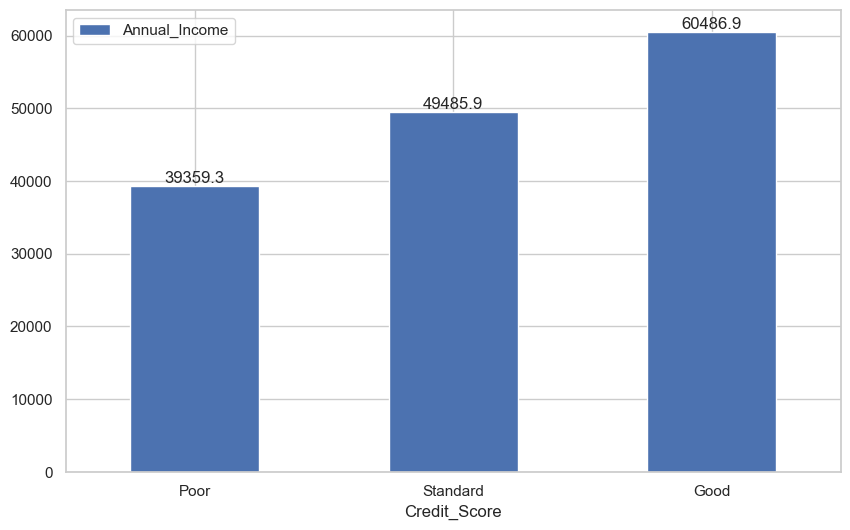

In [36]:
ax = df.groupby("Credit_Score")[["Annual_Income"]].mean().sort_values(by="Annual_Income").plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);

**Conclusion about Annual_Income by credit score:**

As it is seen from the chart above, credit score improves by increasing the Annual_Income level.

### 4. What is the effect of Num_Credit_Inquiries, Num_Bank_Accounts, Num_Credit_Card and Num_of_Loan of customers on credit score?

In [37]:
df.groupby("Credit_Score")[["Num_Credit_Inquiries", "Num_Bank_Accounts", "Num_Credit_Card", "Num_of_Loan"]].mean().sort_values(by="Num_Bank_Accounts")

Num_Credit_Inquiries  Num_Bank_Accounts  Num_Credit_Card  \
Credit_Score                                                             
Good                      3.294970           3.470685         4.156719   
Standard                  5.340551           5.417357         5.416519   
Poor                      8.207151           6.564147         6.640671   

              Num_of_Loan  
Credit_Score               
Good             2.210190  
Standard         3.331391  
Poor             4.781638

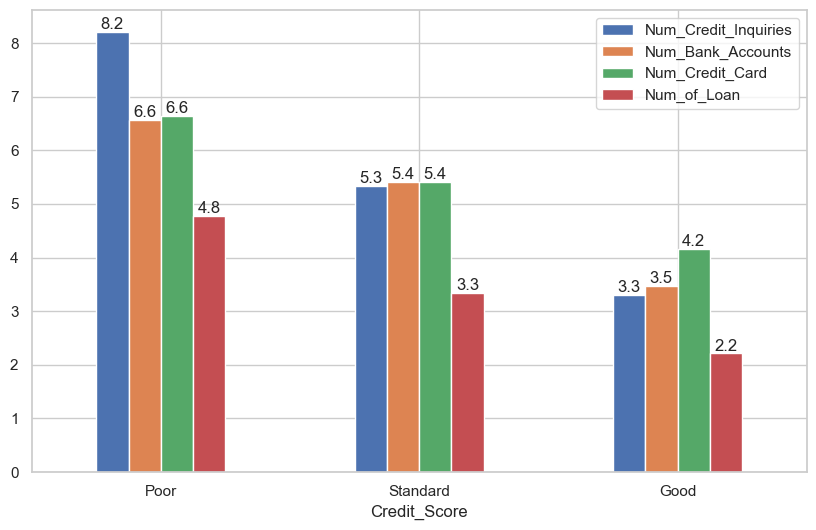

In [38]:
ax = df.groupby("Credit_Score")[["Num_Credit_Inquiries", "Num_Bank_Accounts", "Num_Credit_Card", "Num_of_Loan"]].mean().sort_values(by="Num_Bank_Accounts", ascending=False).plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);


**Conclusion about Num_Credit_Inquiries, Num_Bank_Accounts, Num_Credit_Card and Num_of_Loan by credit score:**

As it is seen from the chart above, the credit score improves as the number credit inquiries, number of bank accounts, number of credit cards and number of loans decreases.

### 5. What is the effect of Delay_from_due_date and  Num_of_Delayed_Payment of customers on credit score?

In [39]:
df.groupby("Credit_Score")[["Delay_from_due_date", "Num_of_Delayed_Payment"]].mean().sort_values(by="Num_of_Delayed_Payment")

Delay_from_due_date  Num_of_Delayed_Payment
Credit_Score                                             
Good                    11.028670                8.664634
Standard                19.890571               13.645718
Poor                    29.898513               15.938969

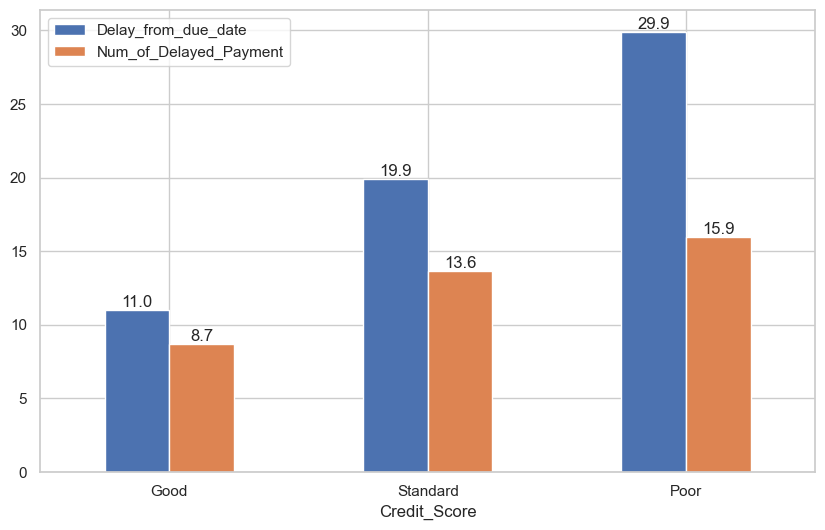

In [40]:
ax = df.groupby("Credit_Score")[["Delay_from_due_date", "Num_of_Delayed_Payment"]].mean().sort_values(by="Num_of_Delayed_Payment").plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);

**Conclusion about Delay_from_due_date and Num_of_Delayed_Payment by credit score:**

As it is seen from the chart above, the credit score gets worse as the delay from due date and number of delayed payment increases.

### 6. What is the effect of Interest_Rate, Changed_Credit_Limit  and  Credit_Utilization_Ratio of customers on credit score?

In [41]:
df.groupby("Credit_Score")[["Interest_Rate", "Changed_Credit_Limit", "Credit_Utilization_Ratio"]].mean().sort_values(by="Interest_Rate")

Interest_Rate  Changed_Credit_Limit  Credit_Utilization_Ratio
Credit_Score                                                               
Good               7.705441              7.158207                 32.568144
Standard          13.844769             11.199177                 32.267302
Poor              20.314347             11.088878                 31.948956

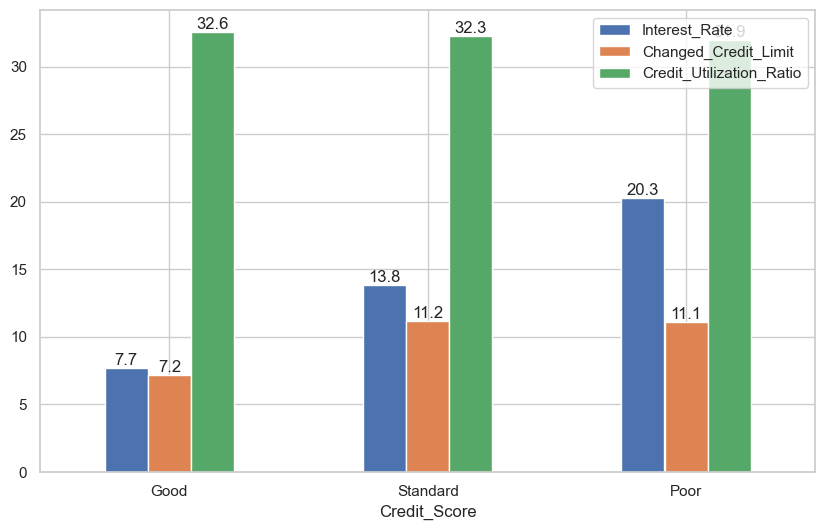

In [42]:
ax = df.groupby("Credit_Score")[["Interest_Rate", "Changed_Credit_Limit", "Credit_Utilization_Ratio"]].mean().sort_values(by="Interest_Rate").plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);

**Conclusion about Interest_Rate, Changed_Credit_Limit and Credit_Utilization_Ratio by credit score:**

As it is seen from the graph above, the credit score gets worse as the interest rate and changed credit limit increases. Credit utilization ratio is almost the same for all credit scores.

### 7. What is the effect of Outstanding_Debt of customers on credit score?

In [43]:
df.groupby("Credit_Score")[["Outstanding_Debt"]].mean().sort_values(by="Outstanding_Debt")

Outstanding_Debt
Credit_Score                  
Good                805.959100
Standard           1285.672973
Poor               2093.776305

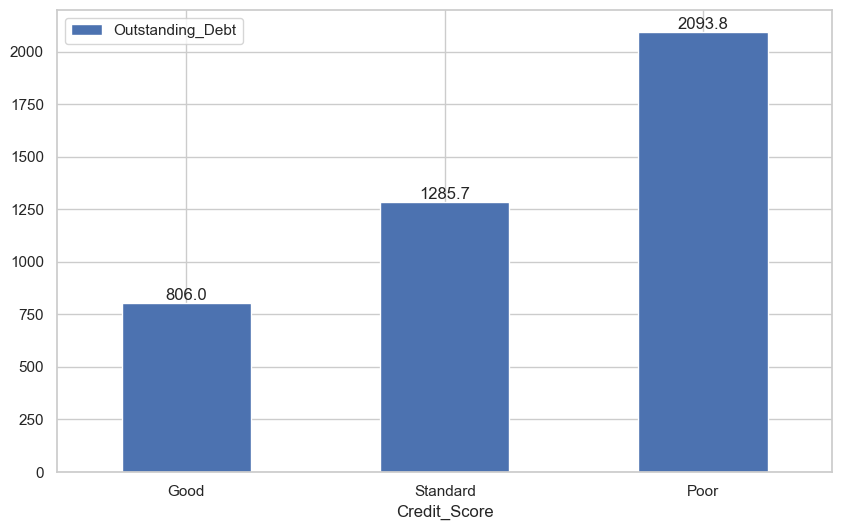

In [44]:
ax = df.groupby("Credit_Score")[["Outstanding_Debt"]].mean().sort_values(by="Outstanding_Debt").plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);

**Conclusion about Outstanding_Debt by credit score:**

As it is seen from the graph above, the credit score gets worse as the outstanding debt increases.

### 8. What is the effect of average Total_EMI_per_month,  Amount_invested_monthly and Monthly_Balance of customers on credit score?

In [45]:
df.groupby("Credit_Score")[["Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]].mean().sort_values(by="Total_EMI_per_month")

Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance
Credit_Score                                                               
Good                    81.162523               235.180613       460.019482
Standard                86.701382               190.244948       402.470363
Poor                    99.921260               156.654153       339.322839

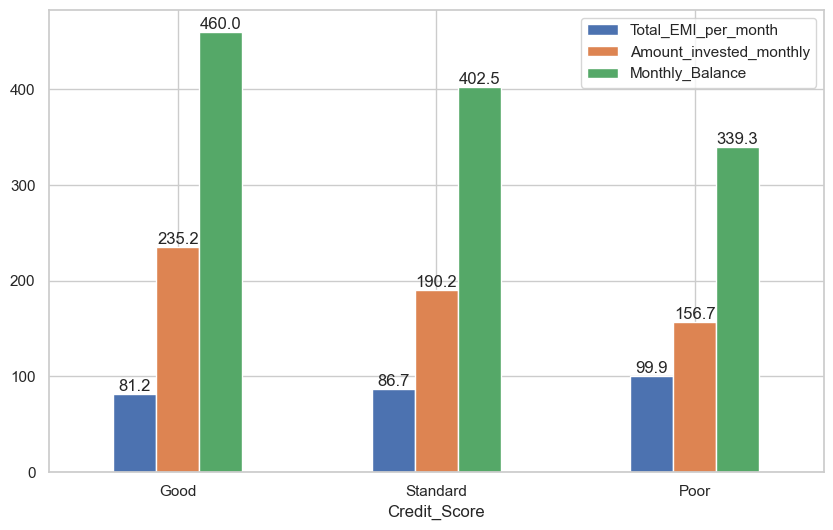

In [46]:
ax = df.groupby("Credit_Score")[["Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]].mean().sort_values(by="Total_EMI_per_month").plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=12);

**Conclusion about Total_EMI_per_month, Amount_invested_monthly and Monthly_Balance by credit score:**

As it is seen from the graph above, the credit score gets worse as the total EMI per month and amount invested monthly increases while the credit score improves as the monthly balance increases.

## <p style="background-color:#7da6ff; font-family:arial; color:#09042b; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make Ready Dataset for ML Models</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#09042b; background-color:#7da6ff" data-toggle="popover">Content</a>

### Convert all features (except for Credit_Score) to numeric by using get_dummies function

In [47]:
df_dummy = pd.get_dummies(df.drop(columns="Credit_Score"), drop_first=True)
df_dummy

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0       23       19114.12                3.0              4.0            3.0   
1       23       19114.12                3.0              4.0            3.0   
2       23       19114.12                3.0              4.0            3.0   
3       23       19114.12                3.0              4.0            3.0   
4       23       19114.12                3.0              4.0            3.0   
...    ...            ...                ...              ...            ...   
98283   25       39628.99                4.0              6.0            7.0   
98284   25       39628.99                4.0              6.0            7.0   
98285   25       39628.99                4.0              6.0            7.0   
98286   25       39628.99                4.0              6.0            7.0   
98287   25       39628.99                4.0              6.0            7.0   

       Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              4.0                    3                     7.0   
1              4.0                   -1                     4.0   
2              4.0                    3                     7.0   
3              4.0                    5                     4.0   
4              4.0                    6                     4.0   
...            ...                  ...                     ...   
98283          2.0                   23                     7.0   
98284          2.0                   18                     7.0   
98285          2.0                   27                     6.0   
98286          2.0                   20                     6.0   
98287          2.0                   18                     6.0   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
0                     11.27                   4.0            809.98   
1                     11.27                   4.0            809.98   
2                     11.27                   4.0            809.98   
3                      6.27                   4.0            809.98   
4                     11.27                   4.0            809.98   
...                     ...                   ...               ...   
98283                 11.50                   3.0            502.38   
98284                 11.50                   3.0            502.38   
98285                 11.50                   3.0            502.38   
98286                 11.50                   3.0            502.38   
98287                 11.50                   3.0            502.38   

       Credit_Utilization_Ratio  Credit_History_Age  Total_EMI_per_month  \
0                     26.822620                 265            49.574949   
1                     31.944960                 266            49.574949   
2                     28.609352                 267            49.574949   
3                     31.377862                 268            49.574949   
4                     24.797347                 269            49.574949   
...                         ...                 ...                  ...   
98283                 34.663572                 378            35.104023   
98284                 40.565631                 379            35.104023   
98285                 41.255522                 380            35.104023   
98286                 33.638208                 381            35.104023   
98287                 34.192463                 382            35.104023   

       Amount_invested_monthly  Monthly_Balance  Occupation_Architect  \
0                    80.415295       312.494089                     0   
1                   118.280222       284.629162                     0   
2                    81.699521       331.209863                     0   
3                   199.458074       223.451310                     0   
4                    41.420153       341.489231                     0   
...                        ...       

In [48]:
# Adding Credit_Score column to the df_dummy

df_dummy["Credit_Score"] = df["Credit_Score"]

In [49]:
df_dummy.head()

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0   23       19114.12                3.0              4.0            3.0   
1   23       19114.12                3.0              4.0            3.0   
2   23       19114.12                3.0              4.0            3.0   
3   23       19114.12                3.0              4.0            3.0   
4   23       19114.12                3.0              4.0            3.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0          4.0                    3                     7.0   
1          4.0                   -1                     4.0   
2          4.0                    3                     7.0   
3          4.0                    5                     4.0   
4          4.0                    6                     4.0   

   Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
0                 11.27                   4.0            809.98   
1                 11.27                   4.0            809.98   
2                 11.27                   4.0            809.98   
3                  6.27                   4.0            809.98   
4                 11.27                   4.0            809.98   

   Credit_Utilization_Ratio  Credit_History_Age  Total_EMI_per_month  \
0                 26.822620                 265            49.574949   
1                 31.944960                 266            49.574949   
2                 28.609352                 267            49.574949   
3                 31.377862                 268            49.574949   
4                 24.797347                 269            49.574949   

   Amount_invested_monthly  Monthly_Balance  Occupation_Architect  \
0                80.415295       312.494089                     0   
1               118.280222       284.629162                     0   
2                81.699521       331.209863                     0   
3               199.458074       223.451310                     0   
4                41.420153       341.489231                     0   

   Occupation_Developer  Occupation_Doctor  Occupation_Engineer  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   Occupation_Entrepreneur  Occupation_Journalist  Occupation_Lawyer  \
0                        0                      0                  0   
1                        0                      0                  0   
2                        0                      0                  0   
3                        0                      0                  0   
4                        0                      0                  0   

   Occupation_Manager  Occupation_Mechanic  Occupation_Media_Manager  \
0                   0                    0                         0   
1                   0                    0                         0   
2                   0                    0                         0   
3                   0                    0                         0   
4                   0                    0                         0   

   Occupation_Musician  Occupation_Scientist  Occupation_Teacher  \
0                    0                     1                   0   
1                    0                     1                   0   
2                    0                     1                   0   
3                    0                     1                   0   
4                    0                     1                   0   

   Occupation_Writer  Payment_of_Min_Amount_Yes Credit_Score  
0                  0                          0         Good  
1                  0                          0         Good  
2                  0                          0  

In [50]:
df_dummy.shape

(98288, 32)

In [51]:
df.shape

(98288, 19)

In [52]:
df_dummy.Credit_Score.value_counts(dropna=False)

Standard    52509
Poor        28723
Good        17056
Name: Credit_Score, dtype: int64

## <p style="background-color:#7da6ff; font-family:arial; color:#09042b; font-size:175%; text-align:center; border-radius:10px 10px;">The End of the Project</p>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#09042b; background-color:#7da6ff" data-toggle="popover">Content</a>

In [53]:
# Saving the df_dummy to use it in machine learning algorithms

df_dummy.to_csv("credit_score_dummy.csv", index=False)